# Statistical analysis

Application of the following analysis to all proteins

### Content of the notebook: 
- Autocorrelation analysis :
    - Autocorrelation function 
    - Autocorrelation time
- Block analysis :
    - BSE
    - Autocorrelation time extracted unsing block analysis
    - Autocorrelation applied to blocks
- Lag plot
- Spectral analysis of the time series
- ? Histograms
- Clustering
- PCA
    - PCA plot
    - scree plot with cumulated variance
    - cosine content
    

In [1]:
import numpy as np
import pandas as pd
import math
import scipy as sc
import matplotlib.pyplot as plt
import os
import MDAnalysis as mda
import matplotlib.ticker as ticker
from matplotlib import axes
import sys
np.set_printoptions(threshold=sys.maxsize)

from MDAnalysis.analysis import rms, align, diffusionmap
from MDAnalysis.lib import distances
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.rms import RMSF

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import scipy.integrate as integral

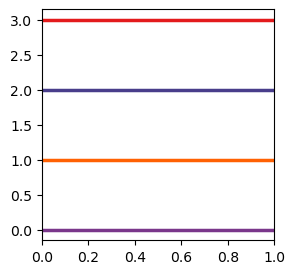

In [2]:
# color identification of protein parts
# colors : [  chain1,    chain2,      as1,      as2    ]
new_cmap = [ '#7A378B', '#FF6103', '#483D8B' ,'#E31A1C' ]
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors2 = rtg_r(np.linspace(0,1,4))

#Test colormap
fig = plt.figure(figsize=(3,3))

for i,color in enumerate(colors2):
    plt.axhline(i, color=colors2[i], linewidth=2.5)
    

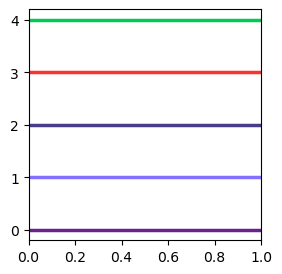

In [3]:
# color selection

# colors = [ 8d4j_1,    8d4j_2,    8d4j_3,    7vh8,    6xhu] 
new_cmap = ['#68228B','#8470FF','#483D8B', '#FF3030', '#00C957' ]
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors = rtg_r(np.linspace(0,1,5))

#Test colormap
fig = plt.figure(figsize=(3,3))

for i,color in enumerate(colors):
    plt.axhline(i, color=colors[i], linewidth=2.5)

In [4]:
datadir = os.getcwd()
datadir

'/Volumes/TERESA-HDD/CBP_project/mutant_8D4J'

# Import data : equilibrated RMSD for 3 mutant simulations and WT

### Aligned universe and path

In [5]:
data3 = datadir+'/3rd_simulation_600ns'
data4 = datadir+'/4th_simulation_600ns'
data5 = datadir+'/5th_simulation_600ns'

data_7vh8 = datadir+'/../WT_7VH8/'
data_6xhu = datadir+'/../WT_6XHU/'

#import data for the universe - same npt file for all 3 simulations
GRO_8D4J = data3+'/3_NPT/npt.gro'
GRO_7VH8 = data_7vh8+'/5_NPT/npt.gro'
GRO_6XHU = data_6xhu+'/3_NPT/npt.gro'

# aligned universe equilibrated
al_8d4j_3_eq = mda.Universe(GRO_8D4J, str(data3+'/4_run/aligned_traj_eq.xtc'))
al_8d4j_4_eq = mda.Universe(GRO_8D4J, str(data4+'/4_run/aligned_traj_eq.xtc'))
al_8d4j_5_eq = mda.Universe(GRO_8D4J, str(data5+'/4_run/aligned_traj_eq.xtc'))
al_7vh8_eq = mda.Universe(GRO_7VH8, str(data_7vh8+'/6_run/aligned_traj_eq.xtc'))
al_6xhu_eq = mda.Universe(GRO_6XHU, str(data_6xhu+'/4_run/aligned_traj_eq.xtc'))


### RMSD equilibrated

In [6]:
# full protein with CA selection
RMSD_CA_3_EQ = data3+'/4_run/data/rmsd/rmsd_ca_eq.dat'
RMSD_CA_4_EQ = data4+'/4_run/data/rmsd/rmsd_ca_eq.dat'
RMSD_CA_5_EQ = data5+'/4_run/data/rmsd/rmsd_ca_eq.dat'
RMSD_CA_7VH8_EQ = data_7vh8+'/6_run/data/rmsd/rmsd_ca_eq.dat'
RMSD_CA_6XHU_EQ = data_6xhu+'/4_run/data/rmsd/rmsd_ca_eq.dat'

rmsd_ca_3_eq = pd.read_csv(RMSD_CA_3_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ca_4_eq = pd.read_csv(RMSD_CA_4_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ca_5_eq = pd.read_csv(RMSD_CA_5_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ca_7vh8_eq = pd.read_csv(RMSD_CA_7VH8_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ca_6xhu_eq = pd.read_csv(RMSD_CA_6XHU_EQ, sep='\s+', header=None,usecols = [0,1,2])

# chain1 and chain2 with CA selection 
RMSD_CH1_3_EQ = data3+'/4_run/data/rmsd/rmsd_ch1_eq.dat'
RMSD_CH2_3_EQ = data3+'/4_run/data/rmsd/rmsd_ch2_eq.dat'
RMSD_CH1_4_EQ = data4+'/4_run/data/rmsd/rmsd_ch1_eq.dat'
RMSD_CH2_4_EQ = data4+'/4_run/data/rmsd/rmsd_ch2_eq.dat'
RMSD_CH1_5_EQ = data5+'/4_run/data/rmsd/rmsd_ch1_eq.dat'
RMSD_CH2_5_EQ = data5+'/4_run/data/rmsd/rmsd_ch2_eq.dat'
RMSD_CH1_7VH8_EQ = data_7vh8+'/6_run/data/rmsd/rmsd_ch1_eq.dat'
RMSD_CH2_7VH8_EQ = data_7vh8+'/6_run/data/rmsd/rmsd_ch2_eq.dat'
RMSD_CH1_6XHU_EQ = data_6xhu+'/4_run/data/rmsd/rmsd_ch1_eq.dat'
RMSD_CH2_6XHU_EQ = data_6xhu+'/4_run/data/rmsd/rmsd_ch2_eq.dat'


rmsd_ch1_3_eq = pd.read_csv(RMSD_CH1_3_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2_3_eq = pd.read_csv(RMSD_CH2_3_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch1_4_eq = pd.read_csv(RMSD_CH1_4_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2_4_eq = pd.read_csv(RMSD_CH2_4_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch1_5_eq = pd.read_csv(RMSD_CH1_5_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2_5_eq = pd.read_csv(RMSD_CH2_5_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch1_7vh8_eq = pd.read_csv(RMSD_CH1_7VH8_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2_7vh8_eq = pd.read_csv(RMSD_CH2_7VH8_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch1_6xhu_eq = pd.read_csv(RMSD_CH1_6XHU_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2_6xhu_eq = pd.read_csv(RMSD_CH2_6XHU_EQ, sep='\s+', header=None,usecols = [0,1,2])

# Autocorrelation analysis

The **autocorrelation function** quantifies the degree to which a quantity is correlated with values of the same quantity at later times. 
Given any observable $f$, let's consider a set of values that are time orderes, such as $f_j = f(t=j\Delta t), j = 1,2,...,N$. These quantities represent the value of the observable $f$ evaluated at multiples of the time step $\Delta t$. 

The autocorrelation function is a measure of correlation between snapshots that are delayed with respect to each other by an amount of time $t'$. As a consequence, it is a function of the separation between snapshots $t'$ according to :

$$ C_f(t') = \frac{1}{\sigma_f^2} \frac{1}{N}\sum_{j=1}^{N-t'/\Delta t} \big( f(j\Delta t)-\langle f \rangle \big) \big( f(j\Delta t + t') - \langle f \rangle \big)$$

## Method 1 : estimate autocorrelation time from 1/e
## Method 2: estimate autocorrelation time integrating the ACF 
A second method to estimate the **autocorrelation time** is by exploiting its definition, namely the integration of the autocorrelation function:
$$ \tau_f = \int_0^\infty C_f(t') dt'$$
According to Grossfield 2009, the integration must be performed carefully due to noise in the long-time tail of the correlation function.
For this reason I have chosen to integrate the ACF only for positive values. The only problem in this case is to correctly choose the maximum number of samples `N_max`.

From that estimate, `N_ind` is calculated as previously, according to :
$$ N_f^{ind} \approx \frac{t_{sim}}{\tau_f}$$



In [51]:
def Autocorrelation_function(input_obs):
    f = input_obs
    N = len(input_obs) # total number of snapshots
    
    mean_f = np.mean(f)
    var_f = np.var(f)
    # k = t'/Dt
    
    Cf = []
    for k in range(N): # can cycle among different possible delays goes from 0 to N-1
        num = 0
        for j in range(N-k):
            num += (f[j] - mean_f) * (f[j+k] - mean_f)
        Cf_k = num/(N * var_f)
        Cf.append(Cf_k)
        
    return Cf

### 8D4J - simulation 3

In [ ]:
auto_3_ca = Autocorrelation_function(rmsd_ca_3_eq[2])
auto_3_ch1 = Autocorrelation_function(rmsd_ch1_3_eq[2])
auto_3_ch2 = Autocorrelation_function(rmsd_ch2_3_eq[2])

time = rmsd_ca_3_eq[1]/1e3 # convert time in [ns]
time = time - time[0] # shift time of time[0] in order to start from 0
np.save(data3+'/4_run/data/data_auto/time', time)
np.save(data3+'/4_run/data/data_auto/auto_ca', auto_3_ca)
np.save(data3+'/4_run/data/data_auto/auto_ch1', auto_3_ch1)
np.save(data3+'/4_run/data/data_auto/auto_ch2', auto_3_ch2)

### Estimate autocorrelation time with a fit

In [47]:
def fit_exp(x, tau, omega, B):
    return   np.exp(-x/tau) * (np.cos(omega * x) + B *np.sin(omega * x))

In [31]:
from scipy.optimize import curve_fit

In [48]:
from scipy.optimize import curve_fit

# Import data - don't need to compute autocorrelation function again

auto_ca = np.load(data3+'/4_run/data/data_auto/auto_ca.npy')
auto_ch1 = np.load(data3+'/4_run/data/data_auto/auto_ch1.npy')
auto_ch2 = np.load(data3+'/4_run/data/data_auto/auto_ch2.npy')
time = np.load(data3+'/4_run/data/data_auto/time.npy')

N = len(auto_ca)
t_sim = time[N-1]

# Perform fitting

fi_ca, cfi_ca = curve_fit(fit_exp, time, auto_ca, maxfev=100000)
fi_ch1, cfi_ch1 = curve_fit(fit_exp, time, auto_ch1, maxfev = 100000)
fi_ch2, cfi_ch2 = curve_fit(fit_exp, time, auto_ch2, maxfev = 100000)

A_ca = 1#fi_ca[0]
tau_ca = fi_ca[0]
omega_ca = fi_ca[1]
B_ca = fi_ca[2]

A_ch1 = 1#fi_ch1[0]
tau_ch1 = fi_ch1[0]
omega_ch1 = fi_ch1[1]
B_ch1 = fi_ch1[2]

A_ch2 =1 #fi_ch2[0]
tau_ch2 = fi_ch2[0]
omega_ch2 = fi_ch2[1]
B_ch2 = fi_ch2[2]

y_fit_ca =  A_ca * np.exp(-time/tau_ca) * (np.cos(omega_ca * time) + B_ca *np.sin(omega_ca * time))
y_fit_ch1 =  A_ch1 * np.exp(-time/tau_ch1) * (np.cos(omega_ch1* time) + B_ch1 *np.sin(omega_ch1 * time))
y_fit_ch2 =  A_ch2 * np.exp(-time/tau_ch2) * (np.cos(omega_ch2* time) + B_ch2 *np.sin(omega_ch2 * time))

print('CA:')
print('A:', A_ca)
print('tau:', tau_ca )
print('omega', omega_ca)
print('B:', B_ca)
print('N_ind :',t_sim/tau_ca)

print()
print('chain 1:')
print('A:', A_ch1)
print('tau:', tau_ch1 )
print('omega', omega_ch1)
print('B:', B_ch1)
print('N_ind :',t_sim/tau_ch1)

print()
print('chain 2:')
print('A', A_ch2)
print('tau:', tau_ch2 )
print('omega', omega_ch2)
print('B:', B_ch2)
print('N_ind :',t_sim/tau_ch2)

CA:
A: 1
tau: 148.68697958227222
omega 0.0063234044514084735
B: -1.1235608874803997
N_ind : 2.690215384856009

chain 1:
A: 1
tau: 179.31059731742056
omega 0.008505981998744592
B: -0.6060219606321359
N_ind : 2.2307660895909516

chain 2:
A 1
tau: 15.164700749789525
omega -9.771345177121388e-09
B: 3.6953765475470393
N_ind : 26.377045389804458


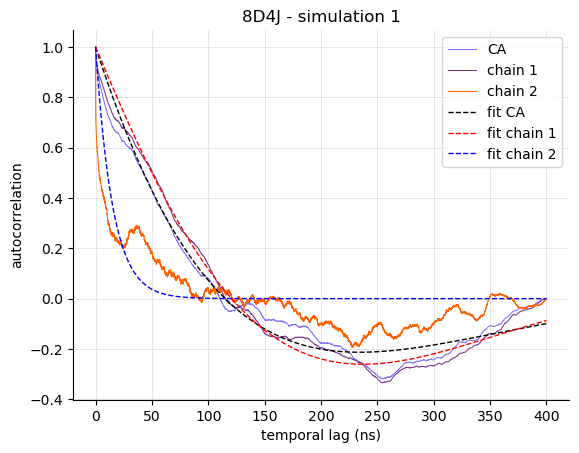

In [49]:
### Plot
ax = plt.subplot(111)

ax.plot(time, auto_ca, color = colors[1], lw=0.75, label = 'CA')
ax.plot(time, auto_ch1, color = colors2[0], lw=0.75, label = 'chain 1')
ax.plot(time, auto_ch2, color = colors2[1], lw=0.75, label = 'chain 2')
ax.plot(time[:], y_fit_ca[:], '--k', lw = 1, label = 'fit CA')
ax.plot(time[:], y_fit_ch1[:], '--r', lw = 1, label = 'fit chain 1')
ax.plot(time[:], y_fit_ch2[:], '--b', lw = 1, label = 'fit chain 2')

ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc = 'best')
ax.set_title("8D4J - simulation 1")
ax.set_xlabel("temporal lag (ns)")
ax.set_ylabel(r"autocorrelation")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Autocorrelation time estimated with integration over the whole domain

In [146]:
### Autocorrelation time - integration (of the positive part of the ACF)
print('Integration of positive ACF:')
N = len(auto_ca) # total number of elements in the autocorrelation function - that corresponds to the total number of snapshots
h = 0 # threshold value
ii = 0
temp = 0
eps = 1e-3
# Search for the autocorrelation time
while (ii != N-1 and temp != 1):
    if((auto_ca[ii] < (h+eps)) and (auto_ca[ii] > (h-eps))):
        temp = 1
        index = ii
    else:
        ii = ii+1


N_max = ii
print("autocorrelation function around 0: ",auto_ca[N_max])
print("N_max: ", N_max)
t_auto_integ = integral.simps(auto_ca[:N_max], time[:N_max])
print('autocorrelation time: ', t_auto_integ, 'ns')


Integration of positive ACF:
autocorrelation function around 0:  0.0007012912265434011
N_max:  2207
autocorrelation time:  43.54606449364133 ns


In [148]:
t_sim = time[N-1]
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('CA:')
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)
# -------------------------------------------------
t_sim = time[N-1]

print()

print('Integration of full ACF')
print('CA:')
t_auto_integ = integral.simps(auto_ca, time)
print('autocorrelation time: ', t_auto_integ, 'ns')
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)


print('chain1:')
t_auto_integ = integral.simps(auto_ch1, time)
print('autocorrelation time: ', t_auto_integ, 'ns')
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)


print('chain2:')
t_auto_integ = integral.simps(auto_ch2, time)
print('autocorrelation time: ', t_auto_integ, 'ns')
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)


CA:
number of independent samples:  -3872891.372407426
std deviation of the mean:  nan

Integration of full ACF
CA:
autocorrelation time:  -0.00021755080718577346 ns
number of independent samples:  -1838650.9577894944
std deviation of the mean:  nan
chain1:
autocorrelation time:  -8.580727184437364e-05 ns
number of independent samples:  -4661609.574599567
std deviation of the mean:  nan
chain2:
autocorrelation time:  -0.00010328200859177628 ns
number of independent samples:  -3872891.372407426
std deviation of the mean:  nan


/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_58375/3734716888.py:3: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_58375/3734716888.py:17: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_58375/3734716888.py:26: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_58375/3734716888.py:35: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean


### 8D4J - simulation 4 

In [ ]:
auto_4_ca = Autocorrelation_function(rmsd_ca_4_eq[2])
auto_4_ch1 = Autocorrelation_function(rmsd_ch1_4_eq[2])
auto_4_ch2 = Autocorrelation_function(rmsd_ch2_4_eq[2])

time = rmsd_ca_4_eq[1]/1e3 # convert time in [ns]
time = time - time[0] # shift time of time[0] in order to start from 0
np.save(data4+'/4_run/data/data_auto/time', time)
np.save(data4+'/4_run/data/data_auto/auto_ca', auto_4_ca)
np.save(data4+'/4_run/data/data_auto/auto_ch1', auto_4_ch1)
np.save(data4+'/4_run/data/data_auto/auto_ch2', auto_4_ch2)

In [50]:
auto_ca = np.load(data4+'/4_run/data/data_auto/auto_ca.npy')
auto_ch1 = np.load(data4+'/4_run/data/data_auto/auto_ch1.npy')
auto_ch2 = np.load(data4+'/4_run/data/data_auto/auto_ch2.npy')
time = np.load(data4+'/4_run/data/data_auto/time.npy')

t_sim = time[N-1]

print()

print('Integration of full ACF')
print('CA:')
t_auto_integ = integral.simps(auto_ca, time)
print('autocorrelation time: ', t_auto_integ, 'ns')
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)


print('chain1:')
t_auto_integ = integral.simps(auto_ch1, time)
print('autocorrelation time: ', t_auto_integ, 'ns')
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)


print('chain2:')
t_auto_integ = integral.simps(auto_ch2, time)
print('autocorrelation time: ', t_auto_integ, 'ns')
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)




Integration of full ACF
CA:
autocorrelation time:  -0.0007847424320601704 ns
number of independent samples:  -509721.3858436164
std deviation of the mean:  nan
chain1:
autocorrelation time:  -0.0002849156388364804 ns
number of independent samples:  -1403924.3392658033
std deviation of the mean:  nan
chain2:
autocorrelation time:  -2.415653200671386e-05 ns
number of independent samples:  -16558668.26781375
std deviation of the mean:  nan


/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_86869/2266443563.py:15: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_86869/2266443563.py:24: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_86869/2266443563.py:33: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean


### Estimation of autocorrelation time with a fit

In [51]:
# Import data - don't need to compute autocorrelation function again

auto_ca = np.load(data4+'/4_run/data/data_auto/auto_ca.npy')
auto_ch1 = np.load(data4+'/4_run/data/data_auto/auto_ch1.npy')
auto_ch2 = np.load(data4+'/4_run/data/data_auto/auto_ch2.npy')
time = np.load(data4+'/4_run/data/data_auto/time.npy')

N = len(auto_ca)
t_sim = time[N-1]
# Perform fitting

fi_ca, cfi_ca = curve_fit(fit_exp, time, auto_ca, maxfev=100000)
fi_ch1, cfi_ch1 = curve_fit(fit_exp, time, auto_ch1, maxfev = 100000)
fi_ch2, cfi_ch2 = curve_fit(fit_exp, time, auto_ch2, maxfev = 100000)

A_ca = 1 #fi_ca[0]
tau_ca = fi_ca[0]
omega_ca = fi_ca[1]
B_ca = fi_ca[2]

A_ch1 = 1 #fi_ch1[0]
tau_ch1 = fi_ch1[0]
omega_ch1 = fi_ch1[1]
B_ch1 = fi_ch1[2]

A_ch2 = 1 #fi_ch2[0]
tau_ch2 = fi_ch2[0]
omega_ch2 = fi_ch2[1]
B_ch2 = fi_ch2[2]

y_fit_ca =  A_ca * np.exp(-time/tau_ca) * (np.cos(omega_ca * time) + B_ca *np.sin(omega_ca * time))
y_fit_ch1 =  A_ch1 * np.exp(-time/tau_ch1) * (np.cos(omega_ch1* time) + B_ch1 *np.sin(omega_ch1 * time))
y_fit_ch2 =  A_ch2 * np.exp(-time/tau_ch2) * (np.cos(omega_ch2* time) + B_ch2 *np.sin(omega_ch2 * time))

print('CA:')
print('A:', A_ca)
print('tau:', tau_ca )
print('omega', omega_ca)
print('B:', B_ca)
print('N_ind :',t_sim/tau_ca)

print()
print('chain 1:')
print('A:', A_ch1)
print('tau:', tau_ch1 )
print('omega', omega_ch1)
print('B:', B_ch1)
print('N_ind :',t_sim/tau_ch1)

print()
print('chain 2:')
print('A:', A_ch2)
print('tau:', tau_ch2 )
print('omega', omega_ch2)
print('B:', B_ch2)
print('N_ind :',t_sim/tau_ch2)


CA:
A: 1
tau: 182.2841794010607
omega 1.7816393809243943e-05
B: -366.0189291902744
N_ind : 2.7429698048556515

chain 1:
A: 1
tau: 113.03249730312554
omega 1.9460516172893677e-05
B: -453.16931926362054
N_ind : 4.42350661915504

chain 2:
A: 1
tau: 167.12677689321333
omega 2.5380106673564317e-05
B: -277.80502392445965
N_ind : 2.991740816730272


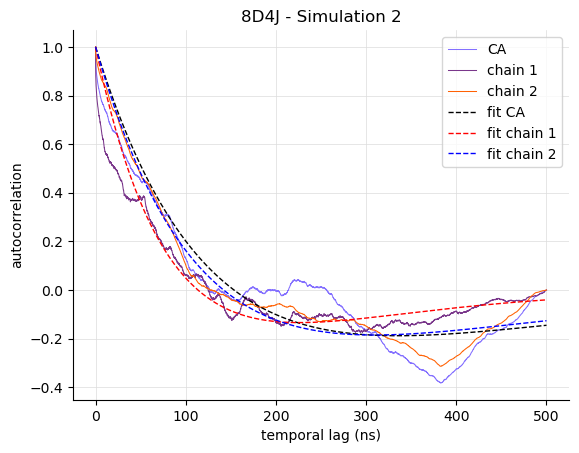

In [52]:
### Plot

ax = plt.subplot(111)

ax.plot(time, auto_ca, color = colors[1], lw=0.75, label = 'CA')
ax.plot(time, auto_ch1, color = colors2[0], lw=0.75, label = 'chain 1')
ax.plot(time, auto_ch2, color = colors2[1], lw=0.75, label = 'chain 2')

#ax.hlines(1/np.exp(1), *ax.get_xlim(), lw = 0.75, color = 'k')
#ax.vlines(index*Dt, *ax.get_ylim(), lw = 0.75, color = 'g')
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc = 'best')
ax.set_title("8D4J - Simulation 2")
ax.set_xlabel("temporal lag (ns)")
ax.set_ylabel(r"autocorrelation")
ax.plot(time[:], y_fit_ca[:], '--k', lw = 1, label = 'fit CA')
ax.plot(time[:], y_fit_ch1[:], '--r', lw = 1, label = 'fit chain 1')
ax.plot(time[:], y_fit_ch2[:], '--b', lw = 1, label = 'fit chain 2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc = 'best')

In [77]:
### Autocorrelation time - integration (of the positive part of the ACF)
print('Integration of positive ACF:')
N = len(auto_ca) # total number of elements in the autocorrelation function - that corresponds to the total number of snapshots
h = 0 # threshold value
ii = 0
temp = 0
eps = 1e-3
# Search for the autocorrelation time
while (ii != N-1 and temp != 1):
    if((auto_ca[ii] < (h+eps)) and (auto_ca[ii] > (h-eps))):
        temp = 1
        index = ii
    else:
        ii = ii+1


N_max = ii
print("autocorrelation function around 0: ",auto_ca[N_max])
print("N_max: ", N_max)
t_auto_integ = integral.simps(auto_ca[:N_max], time[:N_max])
print('autocorrelation time: ', t_auto_integ, 'ns')

t_sim = time[N-1]
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_4_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)

print()
print('Integration of full ACF')
t_auto_integ = integral.simps(auto_ca, time)
print('autocorrelation time: ', t_auto_integ, 'ns')

t_sim = time[N-1]
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_4_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)



Integration of positive ACF:
autocorrelation function around 0:  0.0008183577084048009
N_max:  2528
autocorrelation time:  48.735122092541125 ns
number of independent samples:  10.25954134372682
std deviation of the mean:  0.12825469584950025

Integration of full ACF
autocorrelation time:  -0.0007847424320601704 ns
number of independent samples:  -637151.7323045204
std deviation of the mean:  nan


/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_58375/1036912130.py:36: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_4_eq[2])/N_ind_integ) # std deviation of the mean


### 8D4J - simulation 5

In [ ]:
auto_5_ca = Autocorrelation_function(rmsd_ca_5_eq[2])
auto_5_ch1 = Autocorrelation_function(rmsd_ch1_5_eq[2])
auto_5_ch2 = Autocorrelation_function(rmsd_ch2_5_eq[2])

time = rmsd_ca_5_eq[1]/1e3 # convert time in [ns]
time = time - time[0] # shift time of time[0] in order to start from 0
np.save(data5+'/4_run/data/data_auto/time', time)
np.save(data5+'/4_run/data/data_auto/auto_ca', auto_5_ca)
np.save(data5+'/4_run/data/data_auto/auto_ch1', auto_5_ch1)
np.save(data5+'/4_run/data/data_auto/auto_ch2', auto_5_ch2)


In [153]:
auto_ca = np.load(data5+'/4_run/data/data_auto/auto_ca.npy')
auto_ch1 = np.load(data5+'/4_run/data/data_auto/auto_ch1.npy')
auto_ch2 = np.load(data5+'/4_run/data/data_auto/auto_ch2.npy')
time = np.load(data5+'/4_run/data/data_auto/time.npy')

t_sim = time[N-1]

print()

print('Integration of full ACF')
print('CA:')
t_auto_integ = integral.simps(auto_ca, time)
print('autocorrelation time: ', t_auto_integ, 'ns')
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)


print('chain1:')
t_auto_integ = integral.simps(auto_ch1, time)
print('autocorrelation time: ', t_auto_integ, 'ns')
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)


print('chain2:')
t_auto_integ = integral.simps(auto_ch2, time)
print('autocorrelation time: ', t_auto_integ, 'ns')
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)





Integration of full ACF
CA:
autocorrelation time:  -2.4469904079893467e-05 ns
number of independent samples:  -16346610.869172702
std deviation of the mean:  nan
chain1:
autocorrelation time:  -0.0001648254659585291 ns
number of independent samples:  -2426809.459775117
std deviation of the mean:  nan
chain2:
autocorrelation time:  -0.0010093208940418208 ns
number of independent samples:  -396306.0730846479
std deviation of the mean:  nan


/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_58375/1638987474.py:15: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_58375/1638987474.py:24: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean
/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_58375/1638987474.py:33: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_3_eq[2])/N_ind_integ) # std deviation of the mean


### Estimate of autocorrelation time with a fit

In [53]:
# Import data - don't need to compute autocorrelation function again

auto_ca = np.load(data5+'/4_run/data/data_auto/auto_ca.npy')
auto_ch1 = np.load(data5+'/4_run/data/data_auto/auto_ch1.npy')
auto_ch2 = np.load(data5+'/4_run/data/data_auto/auto_ch2.npy')
time = np.load(data5+'/4_run/data/data_auto/time.npy')

N = len(auto_ca)
t_sim = time[N-1]
# Perform fitting

fi_ca, cfi_ca = curve_fit(fit_exp, time, auto_ca, maxfev=100000)
fi_ch1, cfi_ch1 = curve_fit(fit_exp, time, auto_ch1, maxfev = 100000)
fi_ch2, cfi_ch2 = curve_fit(fit_exp, time, auto_ch2, maxfev = 100000)

A_ca = 1 #fi_ca[0]
tau_ca = fi_ca[0]
omega_ca = fi_ca[1]
B_ca = fi_ca[2]

A_ch1 = 1 #fi_ch1[0]
tau_ch1 = fi_ch1[0]
omega_ch1 = fi_ch1[1]
B_ch1 = fi_ch1[2]

A_ch2 = 1 #fi_ch2[0]
tau_ch2 = fi_ch2[0]
omega_ch2 = fi_ch2[1]
B_ch2 = fi_ch2[2]

y_fit_ca =  A_ca * np.exp(-time/tau_ca) * (np.cos(omega_ca * time) + B_ca *np.sin(omega_ca * time))
y_fit_ch1 =  A_ch1 * np.exp(-time/tau_ch1) * (np.cos(omega_ch1* time) + B_ch1 *np.sin(omega_ch1 * time))
y_fit_ch2 =  A_ch2 * np.exp(-time/tau_ch2) * (np.cos(omega_ch2* time) + B_ch2 *np.sin(omega_ch2 * time))

print('CA:')
print('A', A_ca)
print('tau:', tau_ca )
print('omega', omega_ca)
print('B:', B_ca)
print('N_ind :',t_sim/tau_ca)

print()
print('chain 1:')
print('A', A_ch1)
print('tau:', tau_ch1 )
print('omega', omega_ch1)
print('B:', B_ch1)
print('N_ind :',t_sim/tau_ch1)

print()
print('chain 2:')
print('A', A_ch2)
print('tau:', tau_ch2 )
print('omega', omega_ch2)
print('B:', B_ch2)
print('N_ind :',t_sim/tau_ch2)



CA:
A 1
tau: 151.30851761808094
omega 0.00836342253784651
B: -0.760467820864229
N_ind : 3.304506632350031

chain 1:
A 1
tau: 147.4641525327342
omega 0.0096747995051605
B: -0.6641146164459311
N_ind : 3.3906545517156084

chain 2:
A 1
tau: 63.40794369988699
omega -2.855684162683567e-05
B: 443.6913086072793
N_ind : 7.885447324494945


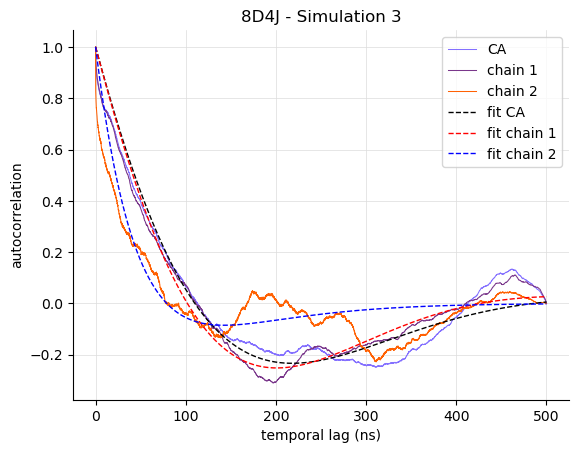

In [34]:
### Plot

ax = plt.subplot(111)

ax.plot(time, auto_ca, color = colors[1], lw=0.75, label = 'CA')
ax.plot(time, auto_ch1, color = colors2[0], lw=0.75, label = 'chain 1')
ax.plot(time, auto_ch2, color = colors2[1], lw=0.75, label = 'chain 2')
ax.plot(time[:], y_fit_ca[:], '--k', lw = 1, label = 'fit CA')
ax.plot(time[:], y_fit_ch1[:], '--r', lw = 1, label = 'fit chain 1')
ax.plot(time[:], y_fit_ch2[:], '--b', lw = 1, label = 'fit chain 2')
#ax.hlines(1/np.exp(1), *ax.get_xlim(), lw = 0.75, color = 'k')
#ax.vlines(index*Dt, *ax.get_ylim(), lw = 0.75, color = 'g')
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc = 'best')
ax.set_title("8D4J - Simulation 3")
ax.set_xlabel("temporal lag (ns)")
ax.set_ylabel(r"autocorrelation")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [124]:
### Autocorrelation time - integration (of the positive part of the ACF)
N = len(auto_ca) # total number of elements in the autocorrelation function - that corresponds to the total number of snapshots
h = 0 # threshold value
ii = 0
temp = 0
eps = 1e-3
# Search for the autocorrelation time
while (ii != N-1 and temp != 1):
    if((auto_ca[ii] < (h+eps)) and (auto_ca[ii] > (h-eps))):
        temp = 1
        index = ii
    else:
        ii = ii+1


N_max = ii
print("autocorrelation function around 0: ",auto_ca[N_max])
print("N_max: ", N_max)
t_auto_integ = integral.simps(auto_ca[:N_max], time[:N_max])
print('autocorrelation time: ', t_auto_integ, 'ns')

t_sim = time[N-1]
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_5_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)

print()
print('Integration of full ACF')
t_auto_integ = integral.simps(auto_ca, time)
print('autocorrelation time: ', t_auto_integ, 'ns')

t_sim = time[N-1]
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_5_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)



autocorrelation function around 0:  0.0006112255786828327
N_max:  2260
autocorrelation time:  42.72498710214666 ns
number of independent samples:  11.702753679119967
std deviation of the mean:  0.0883486480284961

Integration of full ACF
autocorrelation time:  -2.4469904079893467e-05 ns
number of independent samples:  -20433263.586465877
std deviation of the mean:  nan


/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_58375/2608211532.py:35: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_5_eq[2])/N_ind_integ) # std deviation of the mean


In [24]:
# mean value and average for repeated simulations of 8d4j
tau_ca = np.array((149, 182, 51))
mean_tau_ca = np.mean(tau_ca)
std_tau_ca = np.std(tau_ca, ddof = 1)
print('ca : ', mean_tau_ca , std_tau_ca)
tau_ch1 = np.array((179, 113, 146))
mean_tau_ch1 = np.mean(tau_ch1)
std_tau_ch1 = np.std(tau_ch1, ddof = 1)
print('ch1 : ', mean_tau_ch1 , std_tau_ch1)
tau_ch2 = np.array((15, 167, 63))
mean_tau_ch2 = np.mean(tau_ch2)
std_tau_ch2 = np.std(tau_ch2, ddof = 1)
print('ch2 : ', mean_tau_ch2 , std_tau_ch2)


ca :  127.33333333333333 68.13467056743823
ch1 :  146.0 33.0
ch2 :  81.66666666666667 77.70027884977848


### 7VH8

In [128]:
# fit the function with a line
def fit_exp2(x, tau, omega, B1, A2, B2):
    return   np.exp(-x/tau) * (np.cos(omega * x) + B1 *np.sin(omega * x) + A2/2 * np.cos(omega * x) + B2/2* np.sin(omega * x))

In [ ]:
auto_7vh8_ca = Autocorrelation_function(rmsd_ca_7vh8_eq[2])
auto_7vh8_ch1 = Autocorrelation_function(rmsd_ch1_7vh8_eq[2])
auto_7vh8_ch2 = Autocorrelation_function(rmsd_ch2_7vh8_eq[2])

time = rmsd_ca_7vh8_eq[1]/1e3 # convert time in [ns]
time = time - time[0] # shift time of time[0] in order to start from 0
np.save(data_7vh8+'/6_run/data/data_auto/time', time)
np.save(data_7vh8+'/6_run/data/data_auto/auto_ca', auto_7vh8_ca)
np.save(data_7vh8+'/6_run/data/data_auto/auto_ch1', auto_7vh8_ch1)
np.save(data_7vh8+'/6_run/data/data_auto/auto_ch2', auto_7vh8_ch2)




In [54]:
# Import data - don't need to compute autocorrelation function again

auto_ca = np.load(data_7vh8+'/6_run/data/data_auto/auto_ca.npy')
auto_ch1 = np.load(data_7vh8+'/6_run/data/data_auto/auto_ch1.npy')
auto_ch2 = np.load(data_7vh8+'/6_run/data/data_auto/auto_ch2.npy')
time = np.load(data_7vh8+'/6_run/data/data_auto/time.npy')

N = len(auto_ca)
t_sim = time[N-1]
# Perform fitting

fi_ca, cfi_ca = curve_fit(fit_exp, time, auto_ca, maxfev=100000)
fi_ch1, cfi_ch1 = curve_fit(fit_exp, time, auto_ch1, maxfev = 100000)
fi_ch2, cfi_ch2 = curve_fit(fit_exp, time, auto_ch2, maxfev = 100000)

A_ca = 1 #fi_ca[0]
tau_ca = fi_ca[0]
omega_ca = fi_ca[1]
B_ca = fi_ca[2]


A_ch1 = 1 #fi_ch1[0]
tau_ch1 = fi_ch1[0]
omega_ch1 = fi_ch1[1]
B_ch1 = fi_ch1[2]


A_ch2 = 1 #fi_ch2[0]
tau_ch2 = fi_ch2[0]
omega_ch2 = fi_ch2[1]
B_ch2 = fi_ch2[2]


y_fit_ca =  A_ca * np.exp(-time/tau_ca) * (np.cos(omega_ca * time) + B_ca *np.sin(omega_ca * time))
y_fit_ch1 =  A_ch1 * np.exp(-time/tau_ch1) * (np.cos(omega_ch1* time) + B_ch1 *np.sin(omega_ch1 * time))
y_fit_ch2 =  A_ch2 * np.exp(-time/tau_ch2) * (np.cos(omega_ch2* time) + B_ch2 *np.sin(omega_ch2 * time))


print('CA:')
print('A:', A_ca)
print('tau:', tau_ca )
print('omega', omega_ca)
print('B:', B_ca)
print('N_ind :',t_sim/tau_ca)

print()
print('chain 1:')
print('A:', A_ch1)
print('tau:', tau_ch1 )
print('omega', omega_ch1)
print('B:', B_ch1)
print('N_ind :',t_sim/tau_ch1)


print()
print('chain 2:')
print('A:', A_ch2)
print('tau:', tau_ch2 )
print('omega', omega_ch2)
print('B:', B_ch2)
print('N_ind :',t_sim/tau_ch2)



CA:
A: 1
tau: 18.836265470834697
omega 0.027208548737026446
B: 0.29769635949595147
N_ind : 21.23563190481381

chain 1:
A: 1
tau: 15.797702611767454
omega -6.368273377719129e-07
B: 4.701152954969595
N_ind : 25.32013735351914

chain 2:
A: 1
tau: 97.77890996256963
omega 3.479505925871106e-05
B: -302.3579286353134
N_ind : 4.090861722155856


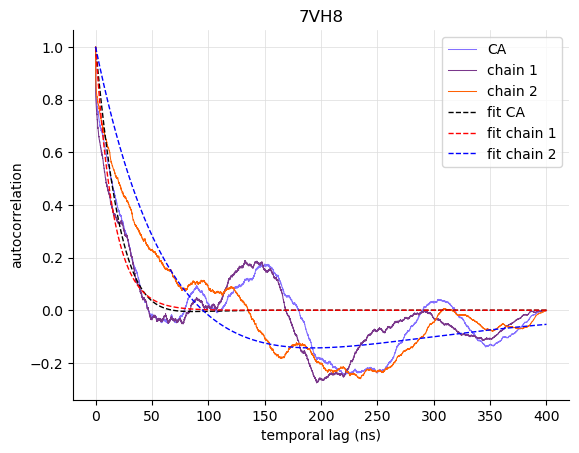

In [37]:
### Plot

ax = plt.subplot(111)

ax.plot(time, auto_ca, color = colors[1], lw=0.75, label = 'CA')
ax.plot(time, auto_ch1, color = colors2[0], lw=0.75, label = 'chain 1')
ax.plot(time, auto_ch2, color = colors2[1], lw=0.75, label = 'chain 2')
ax.plot(time[:], y_fit_ca[:], '--k', lw = 1, label = 'fit CA')
ax.plot(time[:], y_fit_ch1[:], '--r', lw = 1, label = 'fit chain 1')
ax.plot(time[:], y_fit_ch2[:], '--b', lw = 1, label = 'fit chain 2')

ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc = 'best')
ax.set_title("7VH8")
ax.set_xlabel("temporal lag (ns)")
ax.set_ylabel(r"autocorrelation")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




In [82]:
### Autocorrelation time - integration (of the positive part of the ACF)
N = len(auto_ca) # total number of elements in the autocorrelation function - that corresponds to the total number of snapshots
h = 0 # threshold value
ii = 0
temp = 0
eps = 1e-3
# Search for the autocorrelation time
while (ii != N-1 and temp != 1):
    if((auto_ca[ii] < (h+eps)) and (auto_ca[ii] > (h-eps))):
        temp = 1
        index = ii
    else:
        ii = ii+1


N_max = ii
print("autocorrelation function around 0: ",auto_ca[N_max])
print("N_max: ", N_max)
t_auto_integ = integral.simps(auto_ca[:N_max], time[:N_max])
print('autocorrelation time: ', t_auto_integ, 'ns')

t_sim = time[N-1]
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_7vh8_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)

print()
print('Integration of full ACF')
t_auto_integ = integral.simps(auto_ca, time)
print('autocorrelation time: ', t_auto_integ, 'ns')

t_sim = time[N-1]
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_7vh8_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)


autocorrelation function around 0:  0.0009744672422428079
N_max:  933
autocorrelation time:  16.764901619365226 ns
number of independent samples:  23.85937055174591
std deviation of the mean:  0.050952958063694556

Integration of full ACF
autocorrelation time:  1.105055815742162e-06 ns
number of independent samples:  361972666.26876915
std deviation of the mean:  1.3081604191885432e-05


# 6XHU

In [28]:
auto_6_ca = Autocorrelation_function(rmsd_ca_6xhu_eq[2])
auto_6_ch1 = Autocorrelation_function(rmsd_ch1_6xhu_eq[2])
auto_6_ch2 = Autocorrelation_function(rmsd_ch2_6xhu_eq[2])

time = rmsd_ca_6xhu_eq[1]/1e3 # convert time in [ns]
time = time - time[0] # shift time of time[0] in order to start from 0
np.save(data_6xhu+'/4_run/data/data_auto/time', time)
np.save(data_6xhu+'/4_run/data/data_auto/auto_ca', auto_6_ca)
np.save(data_6xhu+'/4_run/data/data_auto/auto_ch1', auto_6_ch1)
np.save(data_6xhu+'/4_run/data/data_auto/auto_ch2', auto_6_ch2)

In [27]:
def fit_exp(x, tau, omega, B):
    return   np.exp(-x/tau) * (np.cos(omega * x) + B *np.sin(omega * x))

In [52]:
# Import data - don't need to compute autocorrelation function again

auto_ca = np.load(data_6xhu+'/4_run/data/data_auto/auto_ca.npy')
auto_ch1 = np.load(data_6xhu+'/4_run/data/data_auto/auto_ch1.npy')
auto_ch2 = np.load(data_6xhu+'/4_run/data/data_auto/auto_ch2.npy')
time = np.load(data_6xhu+'/4_run/data/data_auto/time.npy')

N = len(auto_ca)
t_sim = time[N-1]
# Perform fitting

fi_ca, cfi_ca = curve_fit(fit_exp, time, auto_ca, maxfev=100000)
fi_ch1, cfi_ch1 = curve_fit(fit_exp, time, auto_ch1, maxfev = 100000)
fi_ch2, cfi_ch2 = curve_fit(fit_exp, time, auto_ch2, maxfev = 100000)

A_ca = 1 #fi_ca[0]
tau_ca = fi_ca[0]
omega_ca = fi_ca[1]
B_ca = fi_ca[2]


A_ch1 = 1 #fi_ch1[0]
tau_ch1 = fi_ch1[0]
omega_ch1 = fi_ch1[1]
B_ch1 = fi_ch1[2]


A_ch2 = 1 #fi_ch2[0]
tau_ch2 = fi_ch2[0]
omega_ch2 = fi_ch2[1]
B_ch2 = fi_ch2[2]


y_fit_ca =  A_ca * np.exp(-time/tau_ca) * (np.cos(omega_ca * time) + B_ca *np.sin(omega_ca * time))
y_fit_ch1 =  A_ch1 * np.exp(-time/tau_ch1) * (np.cos(omega_ch1* time) + B_ch1 *np.sin(omega_ch1 * time))
y_fit_ch2 =  A_ch2 * np.exp(-time/tau_ch2) * (np.cos(omega_ch2* time) + B_ch2 *np.sin(omega_ch2 * time))


print('CA:')
print('A:', A_ca)
print('tau:', tau_ca )
print('omega', omega_ca)
print('B:', B_ca)
print('N_ind :',t_sim/tau_ca)

print()
print('chain 1:')
print('A:', A_ch1)
print('tau:', tau_ch1 )
print('omega', omega_ch1)
print('B:', B_ch1)
print('N_ind :',t_sim/tau_ch1)


print()
print('chain 2:')
print('A:', A_ch2)
print('tau:', tau_ch2 )
print('omega', omega_ch2)
print('B:', B_ch2)
print('N_ind :',t_sim/tau_ch2)




CA:
A: 1
tau: 191.94085434625617
omega 1.740328139558968e-05
B: -364.6824477448571
N_ind : 2.6049691281357608

chain 1:
A: 1
tau: 225.81802330214663
omega 0.002871121585270968
B: -1.9262928770153798
N_ind : 2.214172246698818

chain 2:
A: 1
tau: 173.43423974515431
omega 1.8932585655750483e-05
B: -354.4145212189365
N_ind : 2.88293707594708


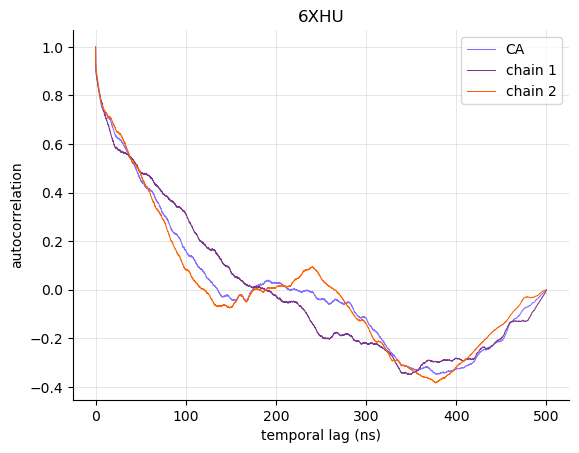

In [53]:
### Plot

ax = plt.subplot(111)

ax.plot(time, auto_ca, color = colors[1], lw=0.75, label = 'CA')
ax.plot(time, auto_ch1, color = colors2[0], lw=0.75, label = 'chain 1')
ax.plot(time, auto_ch2, color = colors2[1], lw=0.75, label = 'chain 2')
#ax.plot(time[:], y_fit_ca[:], '--k', lw = 1, label = 'fit CA')
#ax.plot(time[:], y_fit_ch1[:], '--r', lw = 1, label = 'fit chain 1')
#ax.plot(time[:], y_fit_ch2[:], '--b', lw = 1, label = 'fit chain 2')

ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc = 'best')
ax.set_title("6XHU")
ax.set_xlabel("temporal lag (ns)")
ax.set_ylabel(r"autocorrelation")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



In [35]:
### Autocorrelation time - integration (of the positive part of the ACF)
N = len(auto_ca) # total number of elements in the autocorrelation function - that corresponds to the total number of snapshots
h = 0 # threshold value
ii = 0
temp = 0
eps = 1e-3
# Search for the autocorrelation time
while (ii != N-1 and temp != 1):
    if((auto_ca[ii] < (h+eps)) and (auto_ca[ii] > (h-eps))):
        temp = 1
        index = ii
    else:
        ii = ii+1


N_max = ii
print("autocorrelation function around 0: ",auto_ca[N_max])
print("N_max: ", N_max)
t_auto_integ = integral.simps(auto_ca[:N_max], time[:N_max])
print('autocorrelation time: ', t_auto_integ, 'ns')

t_sim = time[N-1]
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_7vh8_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)

print()
print('Integration of full ACF')
t_auto_integ = integral.simps(auto_ca, time)
print('autocorrelation time: ', t_auto_integ, 'ns')

t_sim = time[N-1]
N_ind_integ = t_sim/t_auto_integ
SE_integ =  np.sqrt(np.var(rmsd_ca_7vh8_eq[2])/N_ind_integ) # std deviation of the mean
print('number of independent samples: ', N_ind_integ)
print('std deviation of the mean: ',SE_integ)



autocorrelation function around 0:  0.0007077890611610326
N_max:  2699
autocorrelation time:  50.52450240842032 ns
number of independent samples:  9.896188505889588
std deviation of the mean:  0.0791161077673142

Integration of full ACF
autocorrelation time:  -5.9255491485998846e-05 ns
number of independent samples:  -8438036.500264997
std deviation of the mean:  nan


/var/folders/tm/kk675_9j3_jdym5wf5p32tgm0000gn/T/ipykernel_55192/1082363926.py:35: RuntimeWarning: invalid value encountered in sqrt
  SE_integ =  np.sqrt(np.var(rmsd_ca_7vh8_eq[2])/N_ind_integ) # std deviation of the mean


## Lag plot 

A **lag plot** is a scatter plot used to identify the relationshipt between two quantities that are plotted on the X-axis and Y-axis respectively. The X-axis represents the dataset with some time units behind or ahead as compared to the Y-axis. The difference between these time units is called lag.
The lag plot contains the following axes :
- Vertical axis : $Y_i$ for all i
- Horizontal axis : $Y_{i-k}$ for all i, where $k$ is the lag value


In [54]:
# fit the function with a line
def fit_line(x, A, B):
    return A + B * x

In [56]:
print(rmsd_ca_3_eq[2].shift(-1))

0       1.225798
1       1.017085
2       1.092388
3       1.068713
4       1.022173
          ...   
7996    3.286978
7997    3.292668
7998    3.344519
7999    3.582137
8000         NaN
Name: 2, Length: 8001, dtype: float64


In [36]:
from scipy.linalg import lstsq
y = rmsd_ca_3_eq[2].shift(-1)
y = y[:-1]
x = rmsd_ch1_3_eq[2]
x = x[:-1]

x_new = x[:,np.newaxis]**[-0.5,1]
p, res,rnk, s = lstsq(x_new, y)

print(p)
y_fit = p[0] + p[1] * x

print(x_new)

[0.00138704 0.92347152]
[[1.07070621e+03 8.72286912e-07]
 [8.97811466e-01 1.24059408e+00]
 [9.94920652e-01 1.01023662e+00]
 [1.05863772e+00 8.92288450e-01]
 [1.00991283e+00 9.80465286e-01]
 [9.74331722e-01 1.05338302e+00]
 [9.73574977e-01 1.05502122e+00]
 [8.74534262e-01 1.30751398e+00]
 [9.32589661e-01 1.14979074e+00]
 [8.37727183e-01 1.42493411e+00]
 [9.00694046e-01 1.23266600e+00]
 [9.30663646e-01 1.15455467e+00]
 [8.54169553e-01 1.37060347e+00]
 [9.22163368e-01 1.17593757e+00]
 [8.81397939e-01 1.28722937e+00]
 [8.76011078e-01 1.30310918e+00]
 [9.71292949e-01 1.05998453e+00]
 [9.15212205e-01 1.19386823e+00]
 [8.33007902e-01 1.44112535e+00]
 [9.47367678e-01 1.11419928e+00]
 [8.96753378e-01 1.24352339e+00]
 [8.65581601e-01 1.33470094e+00]
 [8.72066894e-01 1.31492324e+00]
 [9.15443940e-01 1.19326387e+00]
 [8.16568087e-01 1.49973730e+00]
 [8.94651363e-01 1.24937366e+00]
 [8.51190508e-01 1.38021409e+00]
 [8.40160671e-01 1.41669155e+00]
 [8.52082275e-01 1.37732661e+00]
 [8.81316886e-01 1.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


NameError: name 'x' is not defined

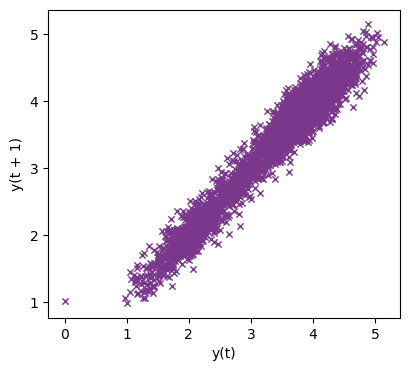

In [55]:
l = 100

f = plt.figure(figsize=(10,4))
# ACF - 8D4J simulation 1
lag_3_ca = f.add_subplot(121)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_3_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chain 1')
lag_3_ca = plt.plot(x, y_fit )


lag_3_ca = pd.plotting.lag_plot(rmsd_ca_3_eq[::2][2], lag = 1, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_3_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+1]')
lag_3_ca.set_title('Lag plot of 8D4J - simulation 1 : lag = 1')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

lag_3_ca = f.add_subplot(122)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_3_eq[:][2], lag = l, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chian 1')
lag_3_ca = pd.plotting.lag_plot(rmsd_ca_3_eq[:][2], lag = l, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_3_eq[:][2], lag = l, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+100]')
lag_3_ca.set_title(f'Lag plot of 8D4J - simulation 1 : lag = 100')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

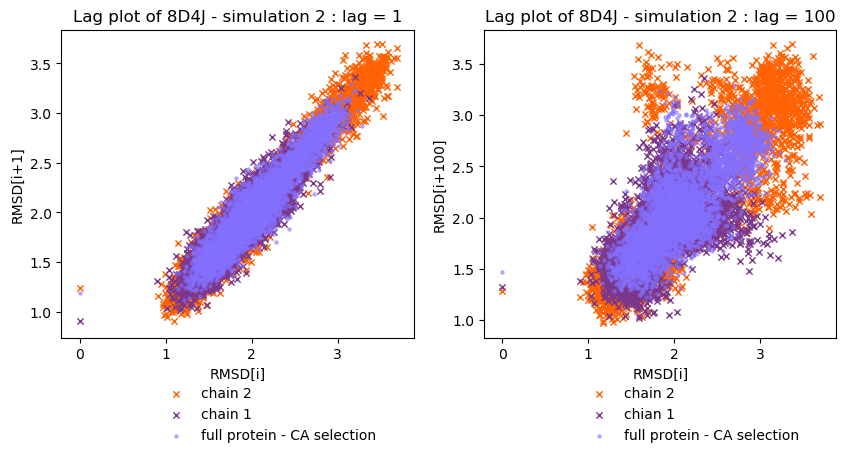

In [56]:
f = plt.figure(figsize=(10,4))
# ACF - 8D4J simulation 1
lag_3_ca = f.add_subplot(121)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_4_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_4_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chain 1')
lag_3_ca = pd.plotting.lag_plot(rmsd_ca_4_eq[::2][2], lag = 1, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+1]')
lag_3_ca.set_title('Lag plot of 8D4J - simulation 2 : lag = 1')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

lag_3_ca = f.add_subplot(122)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_4_eq[::2][2], lag = l, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_4_eq[::2][2], lag = l, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chian 1')
lag_3_ca = pd.plotting.lag_plot(rmsd_ca_4_eq[::2][2], lag = l, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+100]')
lag_3_ca.set_title('Lag plot of 8D4J - simulation 2 : lag = 100')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

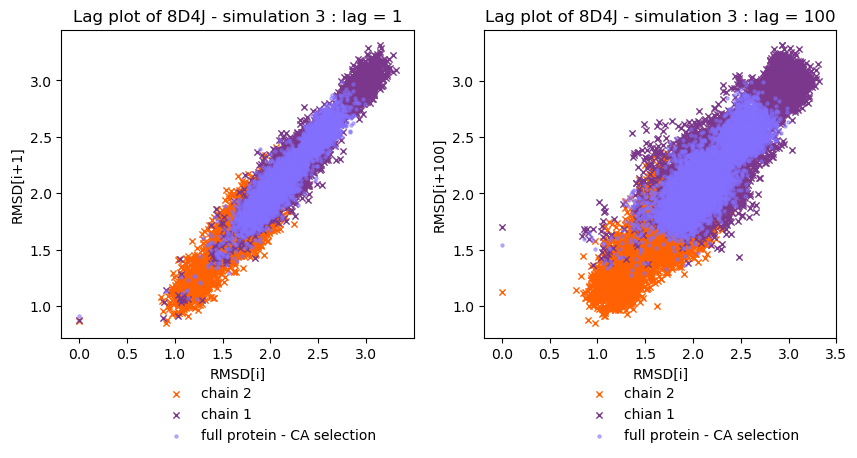

In [126]:
f = plt.figure(figsize=(10,4))
# ACF - 8D4J simulation 1
lag_3_ca = f.add_subplot(121)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_5_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_5_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chain 1')
lag_3_ca = pd.plotting.lag_plot(rmsd_ca_5_eq[::2][2], lag = 1, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+1]')
lag_3_ca.set_title('Lag plot of 8D4J - simulation 3 : lag = 1')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

lag_3_ca = f.add_subplot(122)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_5_eq[:][2], lag = l, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_5_eq[:][2], lag = l, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chian 1')
lag_3_ca = pd.plotting.lag_plot(rmsd_ca_5_eq[:][2], lag = l, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+100]')
lag_3_ca.set_title('Lag plot of 8D4J - simulation 3 : lag = 100')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

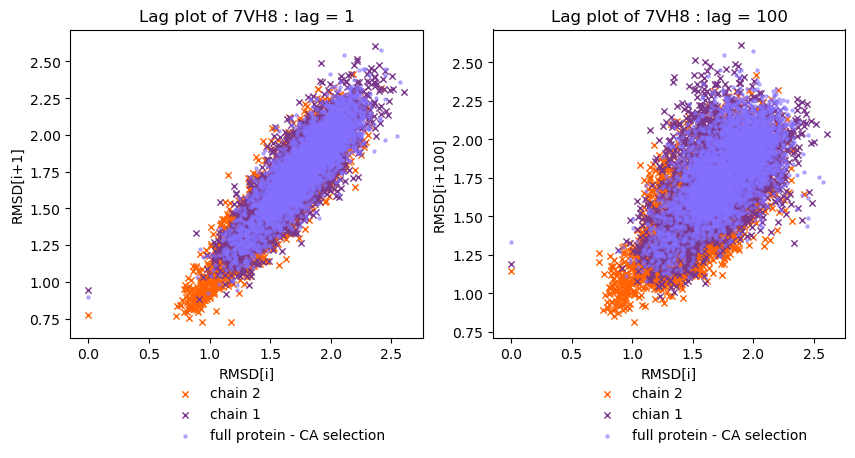

In [88]:
f = plt.figure(figsize=(10,4))
# ACF - 8D4J simulation 1
lag_3_ca = f.add_subplot(121)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_7vh8_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_7vh8_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chain 1')
lag_3_ca = pd.plotting.lag_plot(rmsd_ca_7vh8_eq[::2][2], lag = 1, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+1]')
lag_3_ca.set_title('Lag plot of 7VH8 : lag = 1')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

lag_3_ca = f.add_subplot(122)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_7vh8_eq[::2][2], lag = 100, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_7vh8_eq[::2][2], lag = 100, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chian 1')
lag_3_ca = pd.plotting.lag_plot(rmsd_ca_7vh8_eq[::2][2], lag = 100, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+100]')
lag_3_ca.set_title('Lag plot of 7VH8 : lag = 100')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

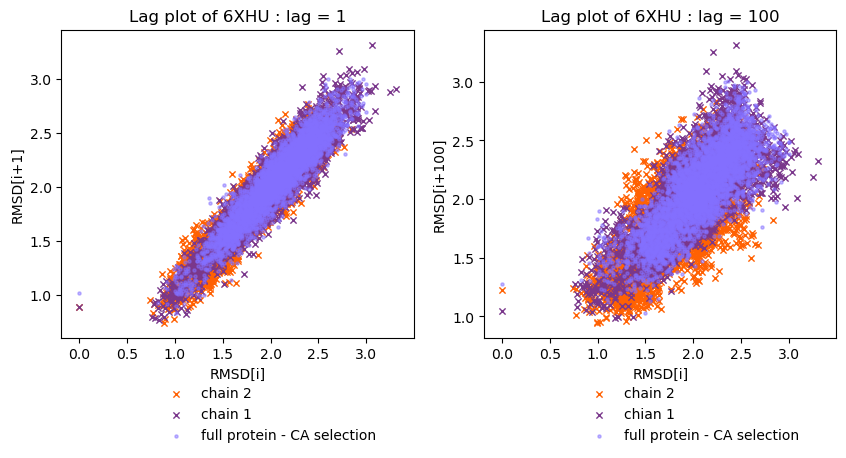

In [58]:
f = plt.figure(figsize=(10,4))
# ACF - 8D4J simulation 1
lag_3_ca = f.add_subplot(121)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_6xhu_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_6xhu_eq[::2][2], lag = 1, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chain 1')
lag_3_ca = pd.plotting.lag_plot(rmsd_ca_6xhu_eq[::2][2], lag = 1, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+1]')
lag_3_ca.set_title('Lag plot of 6XHU : lag = 1')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

lag_3_ca = f.add_subplot(122)
lag_3_ca = pd.plotting.lag_plot(rmsd_ch2_6xhu_eq[::2][2], lag = 100, marker = 'x', s = 20, c = colors2[1], lw = 1, label = 'chain 2')
lag_3_ca = pd.plotting.lag_plot(rmsd_ch1_6xhu_eq[::2][2], lag = 100, marker = 'x', s = 20, c = colors2[0], alpha = 1,lw = 1, label = 'chian 1')
lag_3_ca = pd.plotting.lag_plot(rmsd_ca_6xhu_eq[::2][2], lag = 100, marker = '.', s = 20, c = colors[1], alpha = 0.5,lw = 1, label = 'full protein - CA selection')
lag_3_ca.set_xlabel('RMSD[i]')
lag_3_ca.set_ylabel('RMSD[i+100]')
lag_3_ca.set_title('Lag plot of 6XHU : lag = 100')
leg = lag_3_ca.legend(loc='center left', bbox_to_anchor=(0.25, -0.25))
leg.get_frame().set_linewidth(0.0)

# Block analysis

In [37]:
# algorithm
def BSE_function(arr):
    """
    
    Function to calculate the BSE. Returns both the mean of the mean and the BSE calculated 
    from the std deviation of the mean.
    
    """
    arr = np.asarray(arr)
    input_traj = arr
    nsnaps = len(input_traj)
    avg_array = []
    var_array = []
    BSE_array = []
    BSE_array_print = []
    avg_array_print = []

    avg=0
    for block_len in range(1, nsnaps//4):
        Blocks = nsnaps//block_len # number of blocks
        curr_snapshots = input_traj[:Blocks*block_len].reshape(Blocks,block_len) # reshape returning blocks on rows
        avg = curr_snapshots.mean(axis=1) # mean on frames componing blocks
        
        avg_array.append(avg.mean()) # mean of the mean of blocks
        var_array.append(avg.var(ddof = 1)) # variance of the mean (divided by N-ddof)
        BSE = np.sqrt(var_array[block_len-1]/Blocks)  # BSE = std/sqrt(#of blocks)
        BSE_array.append(BSE)

        if(block_len%200 == 0):
            #print(block_len)
            avg_print = avg_array[block_len-1] # mean of the mean every 200 frames
            BSE_print = BSE_array[block_len-1] # std dev of the mean every 200 frames
            avg_array_print.append(avg_print)
            BSE_array_print.append(BSE_print)

    avg_array = np.asarray(avg_array) # mean of the mean
    var_array = np.asarray(var_array) # var of the mean
    std_array = np.sqrt(var_array) # std dev of the mean
    avg_array_print = np.asarray(avg_array_print)
    BSE_array_print = np.asarray(BSE_array_print)
    BSE_array = np.asarray(BSE_array)
    
    return BSE_array, BSE_array_print, avg_array, avg_array_print, var_array, block_len

### 8D4J - 1

In [8]:
BS_ca = BSE_function(rmsd_ca_3_eq[2])
BS_ch1 = BSE_function(rmsd_ch1_3_eq[2])
BS_ch2 = BSE_function(rmsd_ch2_3_eq[2])

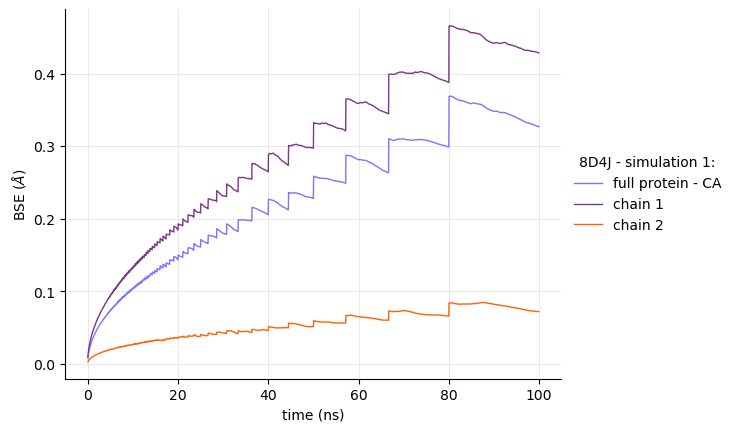

In [9]:
ax = plt.subplot(111)
dt = 0.05 #ns
time = np.arange(1, BS_ca[5]+1,1) * dt

ax.plot(time, BS_ca[0], color = colors[1], lw=1 , label = "full protein - CA" )
ax.plot(time, BS_ch1[0], color = colors2[0], lw=1 , label = "chain 1" )
ax.plot(time, BS_ch2[0], color = colors2[1], lw=1 , label = "chain 2" )
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.45)
#ax.set_xlim([0,1300])

#ax.set_title("Block analysis - 8D4J - CA selection")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"BSE ($\AA$)")
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '8D4J - simulation 1:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [18]:
# estimate of the autocorrelation time 
n_ind = 1999
print(n_ind)
time = rmsd_ca_3_eq[1]/1e3 # convert time in [ns]
t_sim = time[len(rmsd_ca_3_eq[1])-1] 
t_sim = t_sim - time[0] # shift time of time[0] in order to start from 0

# --------------- CA --------------------
BSE_ind_ca = BS_ca[0][n_ind-1] 
var_ind_ca = BS_ca[4][n_ind-1]
print(var_ind_ch1)

corr_time_ca = BSE_ind_ca**2/var_ind_ca * t_sim
print('autocorr. time (CA) : ',corr_time_ca, 'ns')
print('N ind (CA):',t_sim//corr_time_ca)
# --------------- chain 1 --------------------
BSE_ind_ch1 = BS_ch1[0][n_ind-1] 
var_ind_ch1 = BS_ch1[4][n_ind-1]

corr_time_ch1 = BSE_ind_ch1**2/var_ind_ch1 * t_sim
print('autocorr. time (Ch1) : ',corr_time_ch1, 'ns')
print('N ind (Ch1):',t_sim//corr_time_ch1)
# --------------- chain 2 --------------------
n_ind = 1000
BSE_ind_ch2 = BS_ch2[0][n_ind-1] 
var_ind_ch2 = BS_ch2[4][n_ind-1]


corr_time_ch2 = BSE_ind_ch2**2/var_ind_ch2 * t_sim
print('autocorr. time (Ch2) : ',corr_time_ch2, 'ns')
print('N ind (Ch2):',t_sim//corr_time_ch2)

1999
0.7348434842160464
autocorr. time (CA) :  99.99999999999999 ns
N ind (CA): 4.0
autocorr. time (Ch1) :  100.0 ns
N ind (Ch1): 4.0
autocorr. time (Ch2) :  50.000000000000014 ns
N ind (Ch2): 7.0


### 8D4J - 2

In [41]:
BS_ca = BSE_function(rmsd_ca_4_eq[2])
BS_ch1 = BSE_function(rmsd_ch1_4_eq[2])
BS_ch2 = BSE_function(rmsd_ch2_4_eq[2])

In [42]:
print(BS_ca[5])

2499


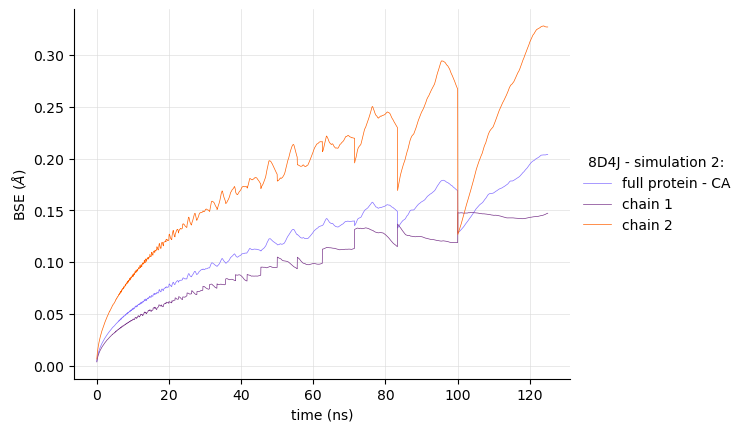

In [36]:
ax = plt.subplot(111)
dt = 0.05 #ns
time = np.arange(1, BS_ca[5]+1,1) * dt

ax.plot(time, BS_ca[0], color = colors[1], lw=0.5 , label = "full protein - CA" )
ax.plot(time, BS_ch1[0], color = colors2[0], lw=0.5 , label = "chain 1" )
ax.plot(time, BS_ch2[0], color = colors2[1], lw=0.5 , label = "chain 2" )
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.45)
#ax.set_xlim([0,1300])

#ax.set_title("Block analysis - 8D4J - CA selection")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"BSE ($\AA$)")
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '8D4J - simulation 2:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [44]:
# estimate of the autocorrelation time 
n_ind = BS_ca[5] # 125 ns
time = rmsd_ca_4_eq[1]/1e3 # convert time in [ns]
t_sim = time[len(rmsd_ca_4_eq[1])-1] 
t_sim = t_sim - time[0] # shift time of time[0] in order to start from 0

# --------------- CA --------------------
BSE_ind_ca = BS_ca[0][n_ind-1] 
var_ind_ca = BS_ca[4][n_ind-1]

corr_time_ca = BSE_ind_ca**2/var_ind_ca * t_sim
print('autocorr. time (CA) : ',corr_time_ca, 'ns')
print('N ind (CA):',t_sim//corr_time_ca)
# --------------- chain 1 --------------------

BSE_ind_ch1 = BS_ch1[0][n_ind-1] 
var_ind_ch1 = BS_ch1[4][n_ind-1]

corr_time_ch1 = BSE_ind_ch1**2/var_ind_ch1 * t_sim
print('autocorr. time (Ch1) : ',corr_time_ch1, 'ns')
print('N ind (Ch1):',t_sim//corr_time_ch1)
# --------------- chain 2 --------------------
n_ind = 1600  #80
BSE_ind_ch2 = BS_ch2[0][n_ind-1] 
var_ind_ch2 = BS_ch2[4][n_ind-1]


corr_time_ch2 = BSE_ind_ch2**2/var_ind_ch2 * t_sim
print('autocorr. time (Ch2) : ',corr_time_ch2, 'ns')
print('N ind (Ch2):',t_sim//corr_time_ch2)

autocorr. time (CA) :  124.99999999999997 ns
N ind (CA): 4.0
autocorr. time (Ch1) :  125.0 ns
N ind (Ch1): 4.0
autocorr. time (Ch2) :  83.33333333333333 ns
N ind (Ch2): 6.0


### 8D4J - simulation 3

In [38]:
BS_ca = BSE_function(rmsd_ca_5_eq[2])
BS_ch1 = BSE_function(rmsd_ch1_5_eq[2])
BS_ch2 = BSE_function(rmsd_ch2_5_eq[2])

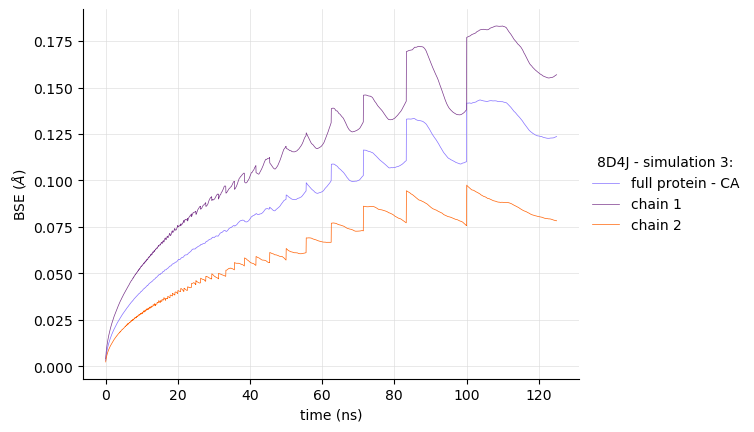

In [39]:
ax = plt.subplot(111)
dt = 0.05 #ns
time = np.arange(1, BS_ca[5]+1,1) * dt

ax.plot(time, BS_ca[0], color = colors[1], lw=0.5 , label = "full protein - CA" )
ax.plot(time, BS_ch1[0], color = colors2[0], lw=0.5 , label = "chain 1" )
ax.plot(time, BS_ch2[0], color = colors2[1], lw=0.5 , label = "chain 2" )
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.45)
#ax.set_xlim([0,1300])

#ax.set_title("Block analysis - 8D4J - CA selection")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"BSE ($\AA$)")
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '8D4J - simulation 3:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [42]:
# estimate of the autocorrelation time 
n_ind = BS_ca[5]
time = rmsd_ca_5_eq[1]/1e3 # convert time in [ns]
t_sim = time[len(rmsd_ca_5_eq[1])-1] 
t_sim = t_sim - time[0] # shift time of time[0] in order to start from 0

# --------------- CA --------------------
BSE_ind_ca = BS_ca[0][n_ind-1] 
var_ind_ca = BS_ca[4][n_ind-1]

corr_time_ca = BSE_ind_ca**2/var_ind_ca * t_sim
print('autocorr. time (CA) : ',corr_time_ca, 'ns')
print('N ind (CA):',t_sim//corr_time_ca)
# --------------- chain 1 --------------------
BSE_ind_ch1 = BS_ch1[0][n_ind-1] 
var_ind_ch1 = BS_ch1[4][n_ind-1]

corr_time_ch1 = BSE_ind_ch1**2/var_ind_ch1 * t_sim
print('autocorr. time (Ch1) : ',corr_time_ch1, 'ns')
print('N ind (Ch1):',t_sim//corr_time_ch1)
# --------------- chain 2 --------------------

BSE_ind_ch2 = BS_ch2[0][n_ind-1] 
var_ind_ch2 = BS_ch2[4][n_ind-1]


corr_time_ch2 = BSE_ind_ch2**2/var_ind_ch2 * t_sim
print('autocorr. time (Ch2) : ',corr_time_ch2, 'ns')
print('N ind (Ch2):',t_sim//corr_time_ch2)

autocorr. time (CA) :  125.0 ns
N ind (CA): 4.0
autocorr. time (Ch1) :  125.0 ns
N ind (Ch1): 4.0
autocorr. time (Ch2) :  125.0 ns
N ind (Ch2): 4.0


### 7VH8

In [12]:
BS_ca = BSE_function(rmsd_ca_7vh8_eq[2])
BS_ch1 = BSE_function(rmsd_ch1_7vh8_eq[2])
BS_ch2 = BSE_function(rmsd_ch2_7vh8_eq[2])

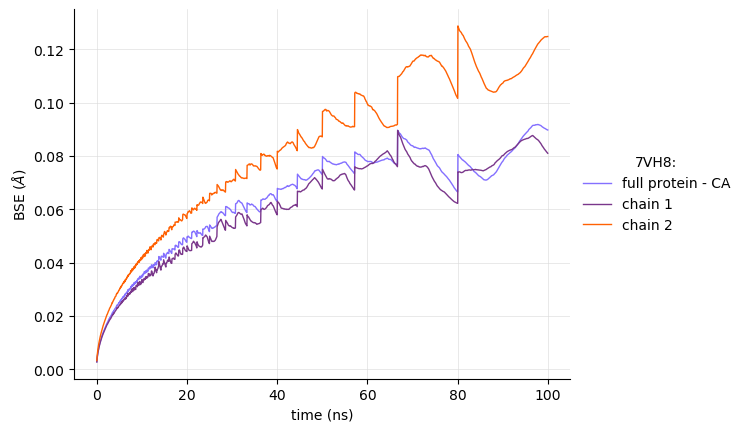

In [13]:
ax = plt.subplot(111)
dt = 0.05 #ns
time = np.arange(1, BS_ca[5]+1,1) * dt

ax.plot(time, BS_ca[0], color = colors[1], lw=1 , label = "full protein - CA" )
ax.plot(time, BS_ch1[0], color = colors2[0], lw=1 , label = "chain 1" )
ax.plot(time, BS_ch2[0], color = colors2[1], lw=1 , label = "chain 2" )
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.45)
#ax.set_xlim([0,1300])

#ax.set_title("Block analysis - 8D4J - CA selection")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"BSE ($\AA$)")
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '7VH8:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [45]:
# estimate of the autocorrelation time 
n_ind = BS_ca[5]
time = rmsd_ca_7vh8_eq[1]/1e3 # convert time in [ns]
t_sim = time[len(rmsd_ca_7vh8_eq[1])-1] 
t_sim = t_sim - time[0] # shift time of time[0] in order to start from 0

# --------------- CA --------------------
BSE_ind_ca = BS_ca[0][n_ind-1] 
var_ind_ca = BS_ca[4][n_ind-1]

corr_time_ca = BSE_ind_ca**2/var_ind_ca * t_sim
print('autocorr. time (CA) : ',corr_time_ca, 'ns')
print('N ind (CA):',t_sim//corr_time_ca)
# --------------- chain 1 --------------------
BSE_ind_ch1 = BS_ch1[0][n_ind-1] 
var_ind_ch1 = BS_ch1[4][n_ind-1]

corr_time_ch1 = BSE_ind_ch1**2/var_ind_ch1 * t_sim
print('autocorr. time (Ch1) : ',corr_time_ch1, 'ns')
print('N ind (Ch1):',t_sim//corr_time_ch1)
# --------------- chain 2 --------------------

BSE_ind_ch2 = BS_ch2[0][n_ind-1] 
var_ind_ch2 = BS_ch2[4][n_ind-1]


corr_time_ch2 = BSE_ind_ch2**2/var_ind_ch2 * t_sim
print('autocorr. time (Ch2) : ',corr_time_ch2, 'ns')
print('N ind (Ch2):',t_sim//corr_time_ch2)

autocorr. time (CA) :  99.99999999999997 ns
N ind (CA): 4.0
autocorr. time (Ch1) :  100.00000000000003 ns
N ind (Ch1): 3.0
autocorr. time (Ch2) :  100.0 ns
N ind (Ch2): 4.0


## 6XHU

In [38]:
BS_ca = BSE_function(rmsd_ca_6xhu_eq[2])
BS_ch1 = BSE_function(rmsd_ch1_6xhu_eq[2])
BS_ch2 = BSE_function(rmsd_ch2_6xhu_eq[2])

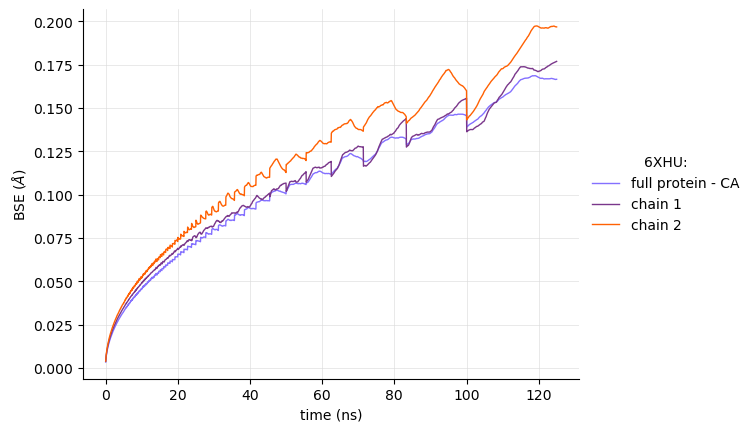

In [39]:
ax = plt.subplot(111)
dt = 0.05 #ns
time = np.arange(1, BS_ca[5]+1,1) * dt

ax.plot(time, BS_ca[0], color = colors[1], lw=1 , label = "full protein - CA" )
ax.plot(time, BS_ch1[0], color = colors2[0], lw=1 , label = "chain 1" )
ax.plot(time, BS_ch2[0], color = colors2[1], lw=1 , label = "chain 2" )
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.45)
#ax.set_xlim([0,1300])

#ax.set_title("Block analysis - 8D4J - CA selection")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"BSE ($\AA$)")
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '6XHU:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [40]:
# estimate of the autocorrelation time 
n_ind = BS_ca[5]
time = rmsd_ca_6xhu_eq[1]/1e3 # convert time in [ns]
t_sim = time[len(rmsd_ca_6xhu_eq[1])-1] 
t_sim = t_sim - time[0] # shift time of time[0] in order to start from 0

# --------------- CA --------------------
BSE_ind_ca = BS_ca[0][n_ind-1] 
var_ind_ca = BS_ca[4][n_ind-1]

corr_time_ca = BSE_ind_ca**2/var_ind_ca * t_sim
print('autocorr. time (CA) : ',corr_time_ca, 'ns')
print('N ind (CA):',t_sim//corr_time_ca)
# --------------- chain 1 --------------------
BSE_ind_ch1 = BS_ch1[0][n_ind-1] 
var_ind_ch1 = BS_ch1[4][n_ind-1]

corr_time_ch1 = BSE_ind_ch1**2/var_ind_ch1 * t_sim
print('autocorr. time (Ch1) : ',corr_time_ch1, 'ns')
print('N ind (Ch1):',t_sim//corr_time_ch1)
# --------------- chain 2 --------------------

BSE_ind_ch2 = BS_ch2[0][n_ind-1] 
var_ind_ch2 = BS_ch2[4][n_ind-1]


corr_time_ch2 = BSE_ind_ch2**2/var_ind_ch2 * t_sim
print('autocorr. time (Ch2) : ',corr_time_ch2, 'ns')
print('N ind (Ch2):',t_sim//corr_time_ch2)

autocorr. time (CA) :  125.0 ns
N ind (CA): 4.0
autocorr. time (Ch1) :  125.0 ns
N ind (Ch1): 4.0
autocorr. time (Ch2) :  125.00000000000003 ns
N ind (Ch2): 3.0


# Spectral analysis of the time series

### Method : periodogram

It's just an estimate for tjhe PSD

In [77]:
from scipy.optimize import curve_fit
# fit the function with a line
def fit_line(x, A, B):
    return A + B * x

### 8D4J - 1

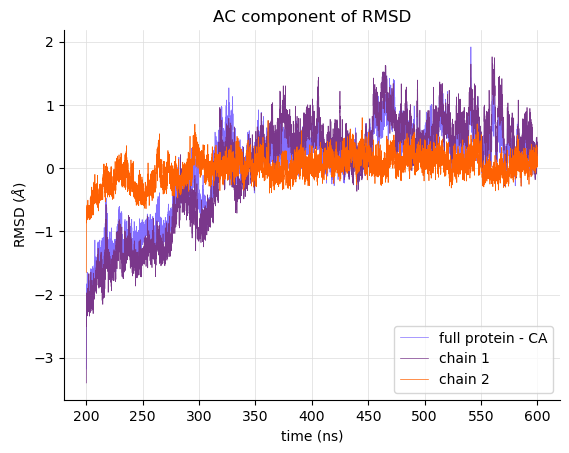

In [136]:
# import data of the signal
rmsd_ca = pd.read_csv(RMSD_CA_3_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch1 = pd.read_csv(RMSD_CH1_3_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2 = pd.read_csv(RMSD_CH2_3_EQ, sep='\s+', header=None,usecols = [0,1,2])

# compute mean value
mean_rmsd_ca = rmsd_ca[2].mean()
mean_rmsd_ch1 = rmsd_ch1[2].mean()
mean_rmsd_ch2 = rmsd_ch2[2].mean()

# fluctuating part of the signal
ac_rmsd_ca = rmsd_ca[2]- mean_rmsd_ca
ac_rmsd_ch1 = rmsd_ch1[2] - mean_rmsd_ch1
ac_rmsd_ch2 = rmsd_ch2[2]- mean_rmsd_ch2

# plot 
time = rmsd_ca[1]/1e3 # time in [ns]
ax = plt.subplot(111)
ax.plot(time, ac_rmsd_ca, color = colors[1], lw=0.5 , label = "full protein - CA")
ax.plot(time, ac_rmsd_ch1, color = colors2[0], lw=0.5 , label = "chain 1")
ax.plot(time, ac_rmsd_ch2, color = colors2[1], lw=0.5 , label = "chain 2")
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.5)

ax.set_title("AC component of RMSD")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



beta_ca: 1.0054042682150288
cov_ca: [[ 3.93974878 -0.41100216]
 [-0.41100216  0.04296399]]
beta_ch1: 1.0632139256679047
cov_ch1: [[ 3.88401601 -0.405188  ]
 [-0.405188    0.04235621]]
beta_ch2:  0.6928553160485416
cov_ch2 [[ 4.14297839 -0.43220346]
 [-0.43220346  0.04518026]]


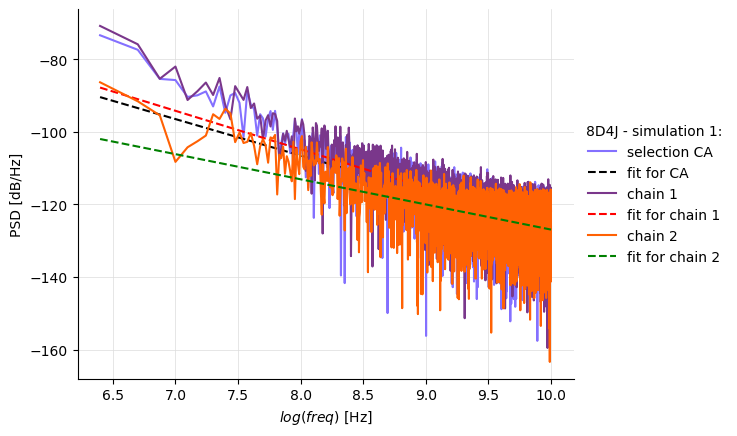

In [137]:
# Calculate the DFT of the time series via FFT algorithm 
n = ac_rmsd_ca.size # number of points in window
Dt = 0.002 * 25000 * 1e-3 # [ns] sampling time in ns
Dt = Dt * 1e-9 # in s
freq = np.fft.fftfreq(n, d = Dt)

i = freq > 0 # select only positive frequencies

fft_ac_rmsd_ca = np.fft.fft(ac_rmsd_ca)
fft_ac_rmsd_ch1 = np.fft.fft(ac_rmsd_ch1)
fft_ac_rmsd_ch2 = np.fft.fft(ac_rmsd_ch2)

periodogram_ca = Dt/n* np.abs(fft_ac_rmsd_ca)**2
periodogram_ch1 = Dt/n *np.abs(fft_ac_rmsd_ch1)**2
periodogram_ch2 =Dt/n* np.abs(fft_ac_rmsd_ch2)**2

# ----------------- CA selection ----------------------
log_per_ca = 10*np.log10(periodogram_ca[i])
log_freq = np.log10(freq[i])

fi_ca, cfi_ca = curve_fit(fit_line, log_freq[:], log_per_ca[:])
A = fi_ca[0]
B = fi_ca[1]
y_fit_ca = A + B * log_freq

beta_ca = -B/10
print('beta_ca:', beta_ca )
print('cov_ca:', cfi_ca)

# ----------------- chain 1 ----------------------
log_per_ch1 = 10*np.log10(periodogram_ch1[i])
log_freq = np.log10(freq[i])

fi_ch1, cfi_ch1 = curve_fit(fit_line, log_freq[:], log_per_ch1[:])
A = fi_ch1[0]
B = fi_ch1[1]
y_fit_ch1 = A + B * log_freq

beta_ch1 = -B/10
print('beta_ch1:', beta_ch1 )
print('cov_ch1:', cfi_ch1)

# ----------------- chain 2 ----------------------
log_per_ch2 = 10*np.log10(periodogram_ch2[i])
log_freq = np.log10(freq[i])

fi_ch2, cfi_ch2 = curve_fit(fit_line, log_freq[:], log_per_ch2[:])
A = fi_ch2[0]
B = fi_ch2[1]
y_fit_ch2= A + B * log_freq

beta_ch2 = -B/10
print('beta_ch2: ', beta_ch2 )
print('cov_ch2', cfi_ch2)

f = plt.figure()
ax = plt.subplot(111)
ax.plot(log_freq, log_per_ca, color = colors[1], label = 'selection CA' );
ax.plot(log_freq[:], y_fit_ca[:], '--k', label = 'fit for CA ')
ax.plot(log_freq, log_per_ch1, color = colors2[0] ,label = 'chain 1' );
ax.plot(log_freq[:], y_fit_ch1[:], '--r', label = 'fit for chain 1')

ax.plot(log_freq, log_per_ch2, color = colors2[1] ,label = 'chain 2' );
ax.plot(log_freq[:], y_fit_ch2[:], '--g', label = 'fit for chain 2')
ax.set_xlabel('$log(freq)$ [Hz]');
ax.set_ylabel('PSD [dB/Hz]')
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc='best')
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '8D4J - simulation 1:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 8D4J -2

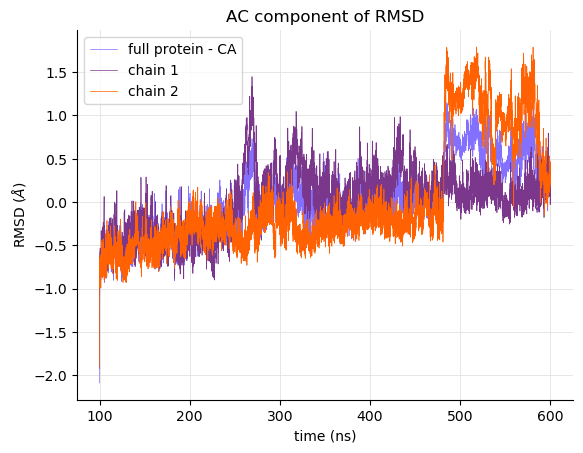

In [138]:
# import data of the signal
rmsd_ca = pd.read_csv(RMSD_CA_4_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch1 = pd.read_csv(RMSD_CH1_4_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2 = pd.read_csv(RMSD_CH2_4_EQ, sep='\s+', header=None,usecols = [0,1,2])

# compute mean value
mean_rmsd_ca = rmsd_ca[2].mean()
mean_rmsd_ch1 = rmsd_ch1[2].mean()
mean_rmsd_ch2 = rmsd_ch2[2].mean()

# fluctuating part of the signal
ac_rmsd_ca = rmsd_ca[2]- mean_rmsd_ca
ac_rmsd_ch1 = rmsd_ch1[2] - mean_rmsd_ch1
ac_rmsd_ch2 = rmsd_ch2[2]- mean_rmsd_ch2

# plot 
time = rmsd_ca[1]/1e3 # time in [ns]
ax = plt.subplot(111)
ax.plot(time, ac_rmsd_ca, color = colors[1], lw=0.5 , label = "full protein - CA")
ax.plot(time, ac_rmsd_ch1, color = colors2[0], lw=0.5 , label = "chain 1")
ax.plot(time, ac_rmsd_ch2, color = colors2[1], lw=0.5 , label = "chain 2")
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.5)

ax.set_title("AC component of RMSD")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




beta_ca: 0.9137882022269517
cov_ca: [[ 3.19995426 -0.33382734]
 [-0.33382734  0.03489687]]
beta_ch1: 0.9461326187504726
cov_ch1: [[ 3.1957603  -0.33338982]
 [-0.33338982  0.03485113]]
beta_ch2:  0.9678272342008434
cov_ch2 [[ 3.24808484 -0.33884844]
 [-0.33884844  0.03542175]]


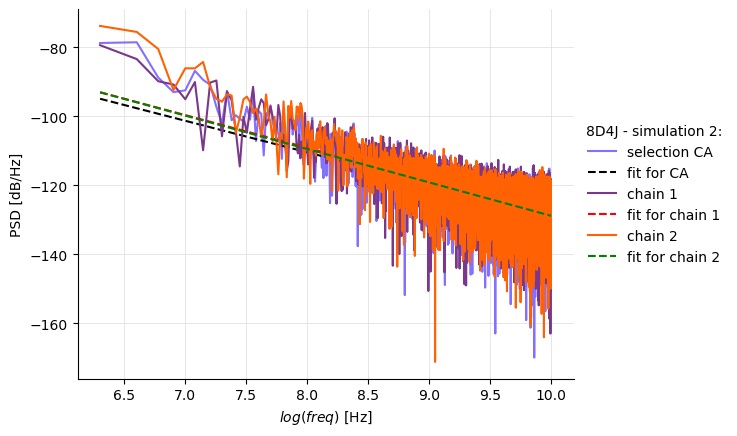

In [139]:
# Calculate the DFT of the time series via FFT algorithm 
n = ac_rmsd_ca.size # number of points in window
Dt = 0.002 * 25000 * 1e-3 # [ns] sampling time in ns
Dt = Dt * 1e-9 # in s
freq = np.fft.fftfreq(n, d = Dt)

i = freq > 0 # select only positive frequencies

fft_ac_rmsd_ca = np.fft.fft(ac_rmsd_ca)
fft_ac_rmsd_ch1 = np.fft.fft(ac_rmsd_ch1)
fft_ac_rmsd_ch2 = np.fft.fft(ac_rmsd_ch2)

periodogram_ca = Dt/n* np.abs(fft_ac_rmsd_ca)**2
periodogram_ch1 = Dt/n *np.abs(fft_ac_rmsd_ch1)**2
periodogram_ch2 =Dt/n* np.abs(fft_ac_rmsd_ch2)**2

# ----------------- CA selection ----------------------
log_per_ca = 10*np.log10(periodogram_ca[i])
log_freq = np.log10(freq[i])

fi_ca, cfi_ca = curve_fit(fit_line, log_freq[:], log_per_ca[:])
A = fi_ca[0]
B = fi_ca[1]
y_fit_ca = A + B * log_freq

beta_ca = -B/10
print('beta_ca:', beta_ca )
print('cov_ca:', cfi_ca)

# ----------------- chain 1 ----------------------
log_per_ch1 = 10*np.log10(periodogram_ch1[i])
log_freq = np.log10(freq[i])

fi_ch1, cfi_ch1 = curve_fit(fit_line, log_freq[:], log_per_ch1[:])
A = fi_ch1[0]
B = fi_ch1[1]
y_fit_ch1 = A + B * log_freq

beta_ch1 = -B/10
print('beta_ch1:', beta_ch1 )
print('cov_ch1:', cfi_ch1)

# ----------------- chain 2 ----------------------
log_per_ch2 = 10*np.log10(periodogram_ch2[i])
log_freq = np.log10(freq[i])

fi_ch2, cfi_ch2 = curve_fit(fit_line, log_freq[:], log_per_ch2[:])
A = fi_ch2[0]
B = fi_ch2[1]
y_fit_ch2= A + B * log_freq

beta_ch2 = -B/10
print('beta_ch2: ', beta_ch2 )
print('cov_ch2', cfi_ch2)

f = plt.figure()
ax = plt.subplot(111)
ax.plot(log_freq, log_per_ca, color = colors[1], label = 'selection CA' );
ax.plot(log_freq[:], y_fit_ca[:], '--k', label = 'fit for CA ')
ax.plot(log_freq, log_per_ch1, color = colors2[0] ,label = 'chain 1' );
ax.plot(log_freq[:], y_fit_ch1[:], '--r', label = 'fit for chain 1')
ax.plot(log_freq, log_per_ch2, color = colors2[1] ,label = 'chain 2' );
ax.plot(log_freq[:], y_fit_ch2[:], '--g', label = 'fit for chain 2')
ax.set_xlabel('$log(freq)$ [Hz]');
ax.set_ylabel('PSD [dB/Hz]')
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc='best')
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '8D4J - simulation 2:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 8D4J -3

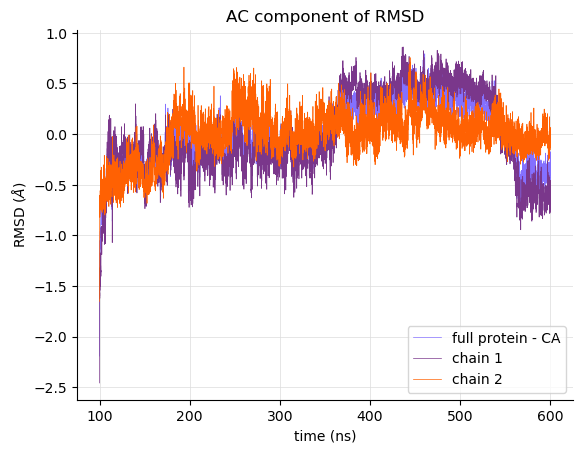

In [140]:
# import data of the signal
rmsd_ca = pd.read_csv(RMSD_CA_5_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch1 = pd.read_csv(RMSD_CH1_5_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2 = pd.read_csv(RMSD_CH2_5_EQ, sep='\s+', header=None,usecols = [0,1,2])

# compute mean value
mean_rmsd_ca = rmsd_ca[2].mean()
mean_rmsd_ch1 = rmsd_ch1[2].mean()
mean_rmsd_ch2 = rmsd_ch2[2].mean()

# fluctuating part of the signal
ac_rmsd_ca = rmsd_ca[2]- mean_rmsd_ca
ac_rmsd_ch1 = rmsd_ch1[2] - mean_rmsd_ch1
ac_rmsd_ch2 = rmsd_ch2[2]- mean_rmsd_ch2

# plot 
time = rmsd_ca[1]/1e3 # time in [ns]
ax = plt.subplot(111)
ax.plot(time, ac_rmsd_ca, color = colors[1], lw=0.5 , label = "full protein - CA")
ax.plot(time, ac_rmsd_ch1, color = colors2[0], lw=0.5 , label = "chain 1")
ax.plot(time, ac_rmsd_ch2, color = colors2[1], lw=0.5 , label = "chain 2")
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.5)

ax.set_title("AC component of RMSD")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




beta_ca: 0.8201628154696374
cov_ca: [[ 3.05121982 -0.31831099]
 [-0.31831099  0.03327486]]
beta_ch1: 0.9249416723034809
cov_ch1: [[ 3.18295902 -0.33205435]
 [-0.33205435  0.03471153]]
beta_ch2:  0.7208648614075612
cov_ch2 [[ 3.17102831 -0.33080971]
 [-0.33080971  0.03458142]]


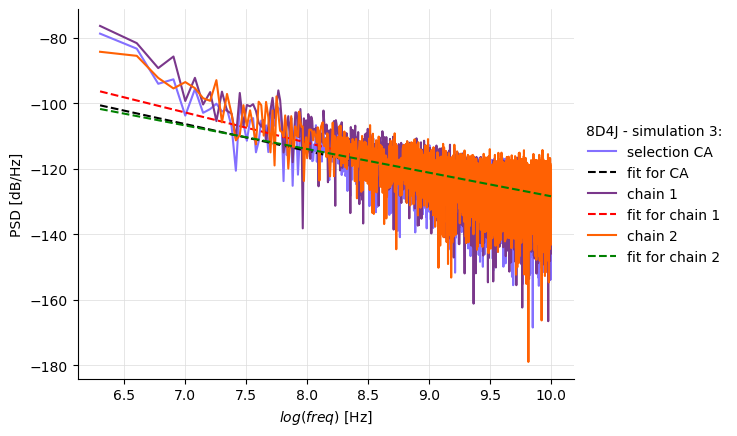

In [141]:
# Calculate the DFT of the time series via FFT algorithm 
n = ac_rmsd_ca.size # number of points in window
Dt = 0.002 * 25000 * 1e-3 # [ns] sampling time in ns
Dt = Dt * 1e-9 # in s
freq = np.fft.fftfreq(n, d = Dt)

i = freq > 0 # select only positive frequencies

fft_ac_rmsd_ca = np.fft.fft(ac_rmsd_ca)
fft_ac_rmsd_ch1 = np.fft.fft(ac_rmsd_ch1)
fft_ac_rmsd_ch2 = np.fft.fft(ac_rmsd_ch2)

periodogram_ca = Dt/n* np.abs(fft_ac_rmsd_ca)**2
periodogram_ch1 = Dt/n *np.abs(fft_ac_rmsd_ch1)**2
periodogram_ch2 =Dt/n* np.abs(fft_ac_rmsd_ch2)**2

# ----------------- CA selection ----------------------
log_per_ca = 10*np.log10(periodogram_ca[i])
log_freq = np.log10(freq[i])

fi_ca, cfi_ca = curve_fit(fit_line, log_freq[:], log_per_ca[:])
A = fi_ca[0]
B = fi_ca[1]
y_fit_ca = A + B * log_freq

beta_ca = -B/10
print('beta_ca:', beta_ca )
print('cov_ca:', cfi_ca)

# ----------------- chain 1 ----------------------
log_per_ch1 = 10*np.log10(periodogram_ch1[i])
log_freq = np.log10(freq[i])

fi_ch1, cfi_ch1 = curve_fit(fit_line, log_freq[:], log_per_ch1[:])
A = fi_ch1[0]
B = fi_ch1[1]
y_fit_ch1 = A + B * log_freq

beta_ch1 = -B/10
print('beta_ch1:', beta_ch1 )
print('cov_ch1:', cfi_ch1)

# ----------------- chain 2 ----------------------
log_per_ch2 = 10*np.log10(periodogram_ch2[i])
log_freq = np.log10(freq[i])

fi_ch2, cfi_ch2 = curve_fit(fit_line, log_freq[:], log_per_ch2[:])
A = fi_ch2[0]
B = fi_ch2[1]
y_fit_ch2= A + B * log_freq

beta_ch2 = -B/10
print('beta_ch2: ', beta_ch2 )
print('cov_ch2', cfi_ch2)

f = plt.figure()
ax = plt.subplot(111)
ax.plot(log_freq, log_per_ca, color = colors[1], label = 'selection CA' );
ax.plot(log_freq[:], y_fit_ca[:], '--k', label = 'fit for CA ')

ax.plot(log_freq, log_per_ch1, color = colors2[0] ,label = 'chain 1' );
ax.plot(log_freq[:], y_fit_ch1[:], '--r', label = 'fit for chain 1')

ax.plot(log_freq, log_per_ch2, color = colors2[1] ,label = 'chain 2' );
ax.plot(log_freq[:], y_fit_ch2[:], '--g', label = 'fit for chain 2')
ax.set_xlabel('$log(freq)$ [Hz]');
ax.set_ylabel('PSD [dB/Hz]')
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc='best')
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '8D4J - simulation 3:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 7VH8

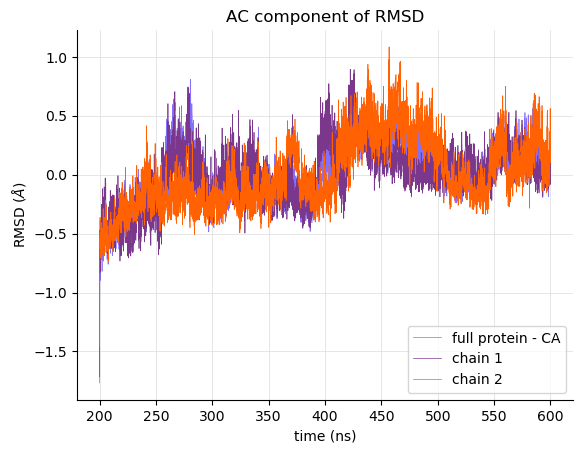

In [142]:
# import data of the signal
rmsd_ca = pd.read_csv(RMSD_CA_7VH8_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch1 = pd.read_csv(RMSD_CH1_7VH8_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2 = pd.read_csv(RMSD_CH2_7VH8_EQ, sep='\s+', header=None,usecols = [0,1,2])

# compute mean value
mean_rmsd_ca = rmsd_ca[2].mean()
mean_rmsd_ch1 = rmsd_ch1[2].mean()
mean_rmsd_ch2 = rmsd_ch2[2].mean()

# fluctuating part of the signal
ac_rmsd_ca = rmsd_ca[2]- mean_rmsd_ca
ac_rmsd_ch1 = rmsd_ch1[2] - mean_rmsd_ch1
ac_rmsd_ch2 = rmsd_ch2[2]- mean_rmsd_ch2

# plot 
time = rmsd_ca[1]/1e3 # time in [ns]
ax = plt.subplot(111)
ax.plot(time, ac_rmsd_ca, color = colors[1], lw=0.5 , label = "full protein - CA")
ax.plot(time, ac_rmsd_ch1, color = colors2[0], lw=0.5 , label = "chain 1")
ax.plot(time, ac_rmsd_ch2, color = colors2[1], lw=0.5 , label = "chain 2")
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.5)

ax.set_title("AC component of RMSD")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

beta_ca: 0.7729516294805354
cov_ca: [[ 4.04873418 -0.42237173]
 [-0.42237173  0.0441525 ]]
beta_ch1: 0.7264278845330001
cov_ch1: [[ 3.92921107 -0.40990285]
 [-0.40990285  0.04284907]]
beta_ch2:  0.8290808796667472
cov_ch2 [[ 3.93930091 -0.41095544]
 [-0.41095544  0.0429591 ]]


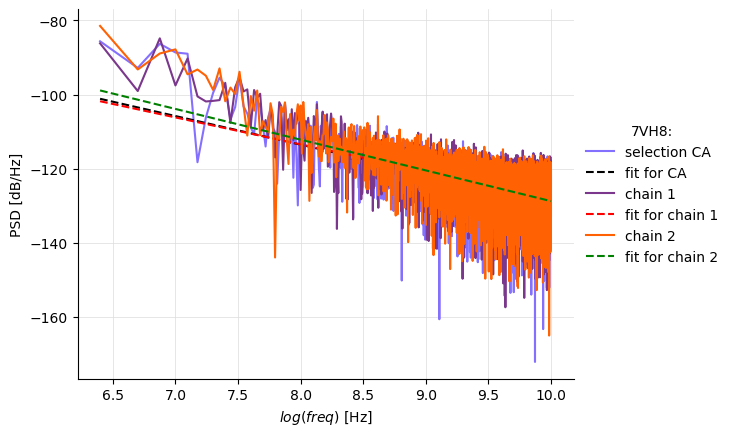

In [143]:
# Calculate the DFT of the time series via FFT algorithm 
n = ac_rmsd_ca.size # number of points in window
Dt = 0.002 * 25000 * 1e-3 # [ns] sampling time in ns
Dt = Dt * 1e-9 # in s
freq = np.fft.fftfreq(n, d = Dt)

i = freq > 0 # select only positive frequencies

fft_ac_rmsd_ca = np.fft.fft(ac_rmsd_ca)
fft_ac_rmsd_ch1 = np.fft.fft(ac_rmsd_ch1)
fft_ac_rmsd_ch2 = np.fft.fft(ac_rmsd_ch2)

periodogram_ca = Dt/n* np.abs(fft_ac_rmsd_ca)**2
periodogram_ch1 = Dt/n *np.abs(fft_ac_rmsd_ch1)**2
periodogram_ch2 =Dt/n* np.abs(fft_ac_rmsd_ch2)**2

# ----------------- CA selection ----------------------
log_per_ca = 10*np.log10(periodogram_ca[i])
log_freq = np.log10(freq[i])

fi_ca, cfi_ca = curve_fit(fit_line, log_freq[:], log_per_ca[:])
A = fi_ca[0]
B = fi_ca[1]
y_fit_ca = A + B * log_freq

beta_ca = -B/10
print('beta_ca:', beta_ca )
print('cov_ca:', cfi_ca)

# ----------------- chain 1 ----------------------
log_per_ch1 = 10*np.log10(periodogram_ch1[i])
log_freq = np.log10(freq[i])

fi_ch1, cfi_ch1 = curve_fit(fit_line, log_freq[:], log_per_ch1[:])
A = fi_ch1[0]
B = fi_ch1[1]
y_fit_ch1 = A + B * log_freq

beta_ch1 = -B/10
print('beta_ch1:', beta_ch1 )
print('cov_ch1:', cfi_ch1)

# ----------------- chain 2 ----------------------
log_per_ch2 = 10*np.log10(periodogram_ch2[i])
log_freq = np.log10(freq[i])

fi_ch2, cfi_ch2 = curve_fit(fit_line, log_freq[:], log_per_ch2[:])
A = fi_ch2[0]
B = fi_ch2[1]
y_fit_ch2= A + B * log_freq

beta_ch2 = -B/10
print('beta_ch2: ', beta_ch2 )
print('cov_ch2', cfi_ch2)

f = plt.figure()
ax = plt.subplot(111)
ax.plot(log_freq, log_per_ca, color = colors[1], label = 'selection CA' );
ax.plot(log_freq[:], y_fit_ca[:], '--k', label = 'fit for CA ')

ax.plot(log_freq, log_per_ch1, color = colors2[0] ,label = 'chain 1' );
ax.plot(log_freq[:], y_fit_ch1[:], '--r', label = 'fit for chain 1')

ax.plot(log_freq, log_per_ch2, color = colors2[1] ,label = 'chain 2' );
ax.plot(log_freq[:], y_fit_ch2[:], '--g', label = 'fit for chain 2')
ax.set_xlabel('$log(freq)$ [Hz]');
ax.set_ylabel('PSD [dB/Hz]')
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc='best')
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '7VH8:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 6XHU

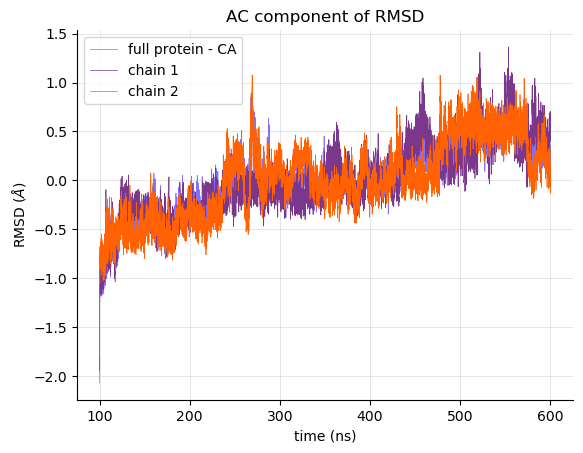

In [59]:
# import data of the signal
rmsd_ca = pd.read_csv(RMSD_CA_6XHU_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch1 = pd.read_csv(RMSD_CH1_6XHU_EQ, sep='\s+', header=None,usecols = [0,1,2])
rmsd_ch2 = pd.read_csv(RMSD_CH2_6XHU_EQ, sep='\s+', header=None,usecols = [0,1,2])

# compute mean value
mean_rmsd_ca = rmsd_ca[2].mean()
mean_rmsd_ch1 = rmsd_ch1[2].mean()
mean_rmsd_ch2 = rmsd_ch2[2].mean()

# fluctuating part of the signal
ac_rmsd_ca = rmsd_ca[2]- mean_rmsd_ca
ac_rmsd_ch1 = rmsd_ch1[2] - mean_rmsd_ch1
ac_rmsd_ch2 = rmsd_ch2[2]- mean_rmsd_ch2

# plot 
time = rmsd_ca[1]/1e3 # time in [ns]
ax = plt.subplot(111)
ax.plot(time, ac_rmsd_ca, color = colors[1], lw=0.5 , label = "full protein - CA")
ax.plot(time, ac_rmsd_ch1, color = colors2[0], lw=0.5 , label = "chain 1")
ax.plot(time, ac_rmsd_ch2, color = colors2[1], lw=0.5 , label = "chain 2")
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.5)

ax.set_title("AC component of RMSD")
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

beta_ca: 0.8710111194873308
cov_ca: [[ 3.18240519 -0.33199658]
 [-0.33199658  0.03470549]]
beta_ch1: 0.9079891486090508
cov_ch1: [[ 3.06962732 -0.32023131]
 [-0.32023131  0.0334756 ]]
beta_ch2:  0.8678311537469041
cov_ch2 [[ 3.10972105 -0.32441398]
 [-0.32441398  0.03391284]]


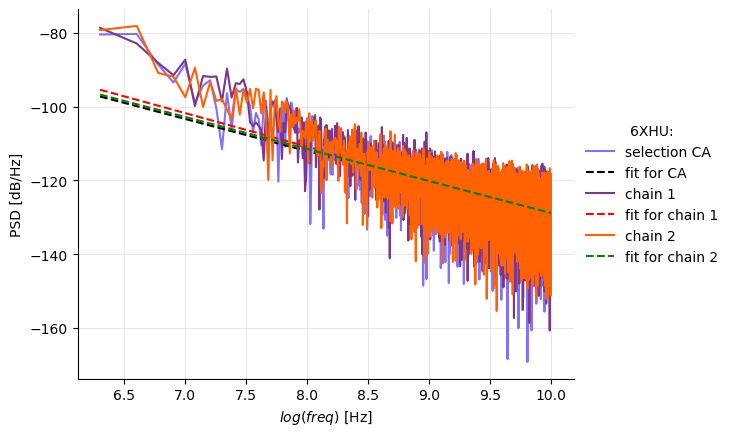

In [61]:
# Calculate the DFT of the time series via FFT algorithm 
n = ac_rmsd_ca.size # number of points in window
Dt = 0.002 * 25000 * 1e-3 # [ns] sampling time in ns
Dt = Dt * 1e-9 # in s
freq = np.fft.fftfreq(n, d = Dt)

i = freq > 0 # select only positive frequencies

fft_ac_rmsd_ca = np.fft.fft(ac_rmsd_ca)
fft_ac_rmsd_ch1 = np.fft.fft(ac_rmsd_ch1)
fft_ac_rmsd_ch2 = np.fft.fft(ac_rmsd_ch2)

periodogram_ca = Dt/n* np.abs(fft_ac_rmsd_ca)**2
periodogram_ch1 = Dt/n *np.abs(fft_ac_rmsd_ch1)**2
periodogram_ch2 =Dt/n* np.abs(fft_ac_rmsd_ch2)**2

# ----------------- CA selection ----------------------
log_per_ca = 10*np.log10(periodogram_ca[i])
log_freq = np.log10(freq[i])

fi_ca, cfi_ca = curve_fit(fit_line, log_freq[:], log_per_ca[:])
A = fi_ca[0]
B = fi_ca[1]
y_fit_ca = A + B * log_freq

beta_ca = -B/10
print('beta_ca:', beta_ca )
print('cov_ca:', cfi_ca)

# ----------------- chain 1 ----------------------
log_per_ch1 = 10*np.log10(periodogram_ch1[i])
log_freq = np.log10(freq[i])

fi_ch1, cfi_ch1 = curve_fit(fit_line, log_freq[:], log_per_ch1[:])
A = fi_ch1[0]
B = fi_ch1[1]
y_fit_ch1 = A + B * log_freq

beta_ch1 = -B/10
print('beta_ch1:', beta_ch1 )
print('cov_ch1:', cfi_ch1)

# ----------------- chain 2 ----------------------
log_per_ch2 = 10*np.log10(periodogram_ch2[i])
log_freq = np.log10(freq[i])

fi_ch2, cfi_ch2 = curve_fit(fit_line, log_freq[:], log_per_ch2[:])
A = fi_ch2[0]
B = fi_ch2[1]
y_fit_ch2= A + B * log_freq

beta_ch2 = -B/10
print('beta_ch2: ', beta_ch2 )
print('cov_ch2', cfi_ch2)

f = plt.figure()
ax = plt.subplot(111)
ax.plot(log_freq, log_per_ca, color = colors[1], label = 'selection CA' );
ax.plot(log_freq[:], y_fit_ca[:], '--k', label = 'fit for CA ')

ax.plot(log_freq, log_per_ch1, color = colors2[0] ,label = 'chain 1' );
ax.plot(log_freq[:], y_fit_ch1[:], '--r', label = 'fit for chain 1')

ax.plot(log_freq, log_per_ch2, color = colors2[1] ,label = 'chain 2' );
ax.plot(log_freq[:], y_fit_ch2[:], '--g', label = 'fit for chain 2')
ax.set_xlabel('$log(freq)$ [Hz]');
ax.set_ylabel('PSD [dB/Hz]')
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.legend(loc='best')
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '6XHU:')
leg.get_frame().set_linewidth(0.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Just to be sure
Periodogram using the scipy function : when I introduce the normalization factor Dt/n then the results calculated by hand and with the function become almost equal.  Recall that the plot is mage in loglog scale and the conversion factor in the Y-axis - to turn in dB - is :
$$ dB = 10*log10(V)$$

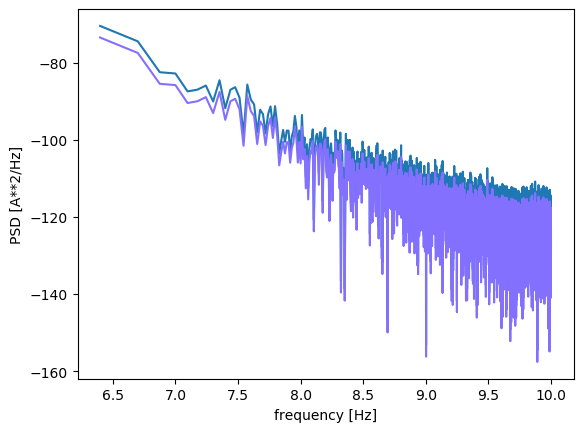

In [94]:
from scipy import signal

Dt = 0.002 * 25000 * 1e-3 # [ns] sampling time in ns
Dt = Dt * 1e-9 # in s
fs = 1/Dt
n = ac_rmsd_ca.size 

f1, Pxx_den1 = signal.periodogram(ac_rmsd_ca, fs)
i = f1 >0
plt.plot(np.log10(f1[i]),10*np.log10(Pxx_den1[i]))
plt.plot(log_freq, log_per_ca, color = colors[1], label = 'selection CA' );

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.show()

### Method : Welch

Accounts for averaged signal

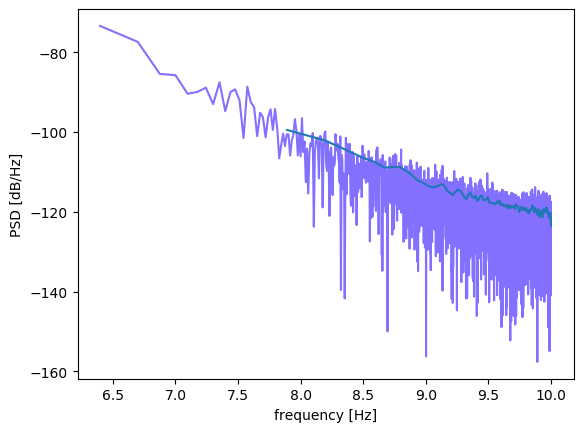

In [99]:
from scipy import signal

Dt = 0.002 * 25000 * 1e-3 # [ns] sampling time in ns
Dt = Dt * 1e-9 # in s
fs = 1/Dt
n = ac_rmsd_ca.size 
f, Pxx_den = sc.signal.welch(ac_rmsd_ca, fs)
i = f >0

plt.plot(log_freq, log_per_ca, color = colors[1], label = 'selection CA' );
plt.plot(np.log10(f[i]),10*np.log10(Pxx_den[i]))

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.show()

# K-means
### Determine the correct number of clusters in the Kmeans method

In [ ]:
from sklearn.cluster import KMeans

# decide the number of clusters K that is ok to use : Elbow method
wcss = []
wcss_ch1 = []

# ----------- CA
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rmsd_mat_eq)
    wcss.append(kmeans.inertia_)
wcss = np.asarray(wcss)

# -------------- chain 1
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rmsd_mat_eq_ch1)
    wcss_ch1.append(kmeans.inertia_)
wcss_ch1 = np.asarray(wcss_ch1)

In [53]:
wcss_ch2 = []
# ------------------ chain 2
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rmsd_mat_eq_ch2)
    wcss_ch2.append(kmeans.inertia_)
wcss_ch2 = np.asarray(wcss_ch2)

In [54]:
np.save(data3+'/4_run/data/clustering/wcss', wcss)
np.save(data3+'/4_run/data/clustering/wcss_ch1', wcss_ch1)
np.save(data3+'/4_run/data/clustering/wcss_ch2', wcss_ch2)

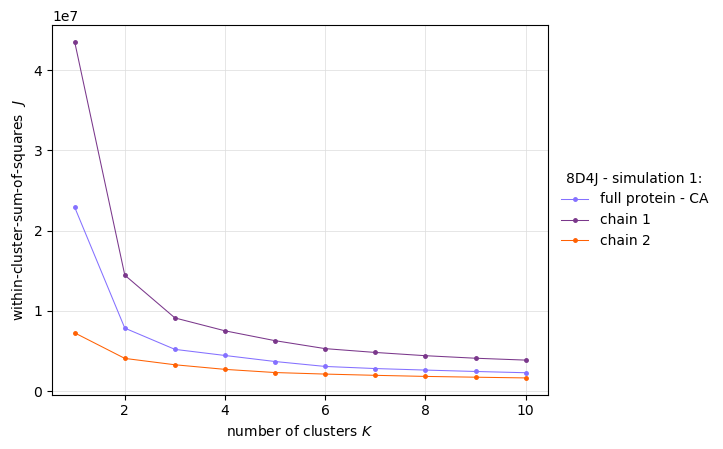

In [56]:
wcss = np.load(data3+'/4_run/data/clustering/wcss.npy')
wcss_ch1 = np.load(data3+'/4_run/data/clustering/wcss_ch1.npy')
wcss_ch2 = np.load(data3+'/4_run/data/clustering/wcss_ch2.npy')

f = plt.figure()
ax = plt.subplot(111)
ax.plot(range(1, 11), wcss, '.-', markersize = '5', lw = 0.75, color = colors[1], label = 'full protein - CA')
ax.plot(range(1, 11), wcss_ch1, '.-', markersize = '5', lw = 0.75, color = colors2[0], label = 'chain 1')
ax.plot(range(1, 11), wcss_ch2, '.-', markersize = '5', lw = 0.75, color = colors2[1], label = 'chain 2')
ax.set_xlabel('number of clusters $K$')
ax.set_ylabel('within-cluster-sum-of-squares  $J$')
ax.legend(loc = 'best')
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = '8D4J - simulation 1:')
leg.get_frame().set_linewidth(0.0)
ax.grid(color = '#DCDCDC', lw = 0.5)



# CA : t = 50

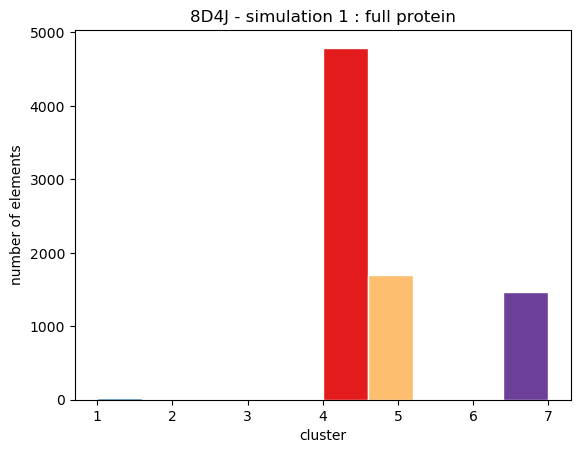

In [19]:
cl_labels = np.load(data3+'/4_run/data/clustering/cl_labels.npy')
# bins : in such a way that the value is centered
N, bins, patches = plt.hist(cl_labels,  edgecolor='white', linewidth=1, align = 'mid', density = False)
plt.xlabel('cluster')
plt.ylabel('number of elements')
plt.title('8D4J - simulation 1 : full protein')

patches[4].set_facecolor(col[4]) # 5
patches[5].set_facecolor(col[5]) # 6
patches[6].set_facecolor(col[6]) # 7
patches[8].set_facecolor(col[8]) # 9
patches[9].set_facecolor(col[9]) # 10

 
plt.show()

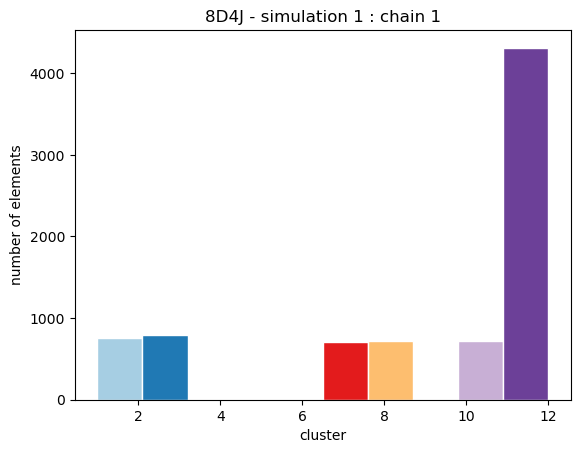

In [21]:
cl_labels_ch1 = np.load(data3+'/4_run/data/clustering/cl_labels_ch1.npy')
# bins : in such a way that the value is centered
N, bins, patches = plt.hist(cl_labels_ch1, edgecolor='white', linewidth=1, align = 'mid')
plt.xlabel('cluster')
plt.ylabel('number of elements')
plt.title('8D4J - simulation 1 : chain 1')
patches[0].set_facecolor(col[0])    
patches[1].set_facecolor(col[1])
patches[2].set_facecolor(col[2])
patches[3].set_facecolor(col[3])
patches[4].set_facecolor(col[4])
patches[5].set_facecolor(col[5])
patches[6].set_facecolor(col[6])
patches[7].set_facecolor(col[7])
patches[8].set_facecolor(col[8])
patches[9].set_facecolor(col[9])


plt.show()

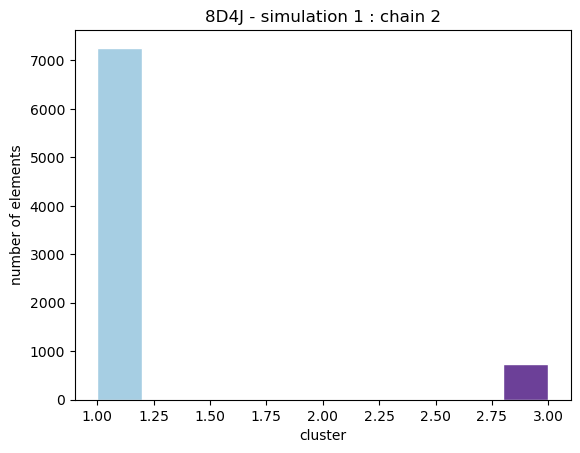

In [22]:
cl_labels_ch2 = np.load(data3+'/4_run/data/clustering/cl_labels_ch2.npy')
# bins : in such a way that the value is centered
N, bins, patches = plt.hist(cl_labels_ch2,  edgecolor='white', linewidth=1, align = 'mid')
plt.xlabel('cluster')
plt.ylabel('number of elements')
plt.title('8D4J - simulation 1 : chain 2')
patches[0].set_facecolor(col[0])    
patches[1].set_facecolor(col[1])
patches[2].set_facecolor(col[2])
patches[3].set_facecolor(col[3])
patches[4].set_facecolor(col[4])
patches[5].set_facecolor(col[5])
patches[6].set_facecolor(col[6])
patches[7].set_facecolor(col[7])
patches[8].set_facecolor(col[8])
patches[9].set_facecolor(col[9])

plt.show()

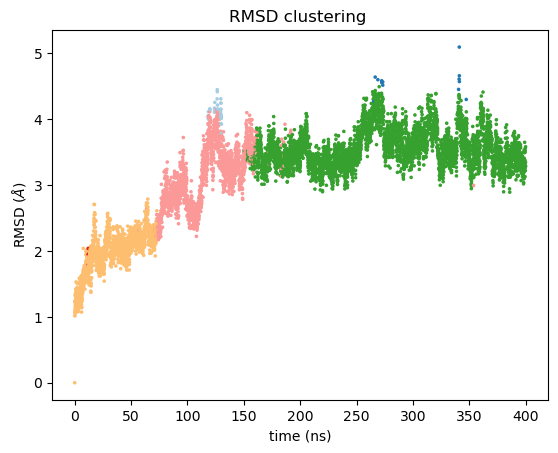

In [40]:
# ------- CA
classes = np.unique(cl_labels)
count1 = (cl_labels == 1).sum()
count2 = (cl_labels == 2).sum()
count3 = (cl_labels == 3).sum()
count4 = (cl_labels == 4).sum()
count5 = (cl_labels == 5).sum()
count6 = (cl_labels == 6).sum()
count7 = (cl_labels == 7).sum()


#coll = [col[0], col[1], col[2], col[3], col[4], col[5], col[6], col[7]]

color = []
for ii in range(len(cl_labels)):
    if(cl_labels[ii] == 1):
        cc = col[0]
    elif (cl_labels[ii] == 2):
        cc = col[1]
    elif (cl_labels[ii] == 3):
        cc = col[2] 
    elif (cl_labels[ii] == 4):
        cc = col[3]
    elif (cl_labels[ii] == 5):
        cc = col[4]
    elif (cl_labels[ii] == 6):
        cc = col[5] 
    elif (cl_labels[ii] == 7):
        cc = col[6]
    color.append(cc)

# ------- Chain1 
classes_1 = np.unique(cl_labels_ch1)
count1_1 = (cl_labels_ch1 == 1).sum()
count2_1 = (cl_labels_ch1 == 2).sum()
count3_1 = (cl_labels_ch1 == 3).sum()
count4_1 = (cl_labels_ch1 == 4).sum()
count5_1 = (cl_labels_ch1 == 5).sum()
count6_1 = (cl_labels_ch1 == 6).sum()
count7_1 = (cl_labels_ch1 == 7).sum()
count8_1 = (cl_labels_ch1 == 8).sum()
count9_1 = (cl_labels_ch1 == 9).sum()
count10_1 = (cl_labels_ch1 == 10).sum()
count11_1 = (cl_labels_ch1 == 11).sum()
count12_1 = (cl_labels_ch1 == 12).sum()


#coll1 = [col[0], col[1], col[2], col[3], col[4], col[5], col[6], col[7], col[8], col[9], col[10], col[11]]

time = rmsd_ca_3_eq[1]/1e3 # time in [ns]
time = time - time[0]
plt.scatter(time, rmsd_ca_3_eq[2],  c = color, marker = '.', s = 10, label = 'full protien - CA', )

plt.xlabel('time (ns)')
plt.ylabel('RMSD ($\AA$)')
plt.title('RMSD clustering ')

#plt.grid(color = '#DCDCDC', lw = 0.5)
#scatter = plt.scatter(time, rmsd_ca[2], c=cl_labels, marker = '.' )

plt.show()

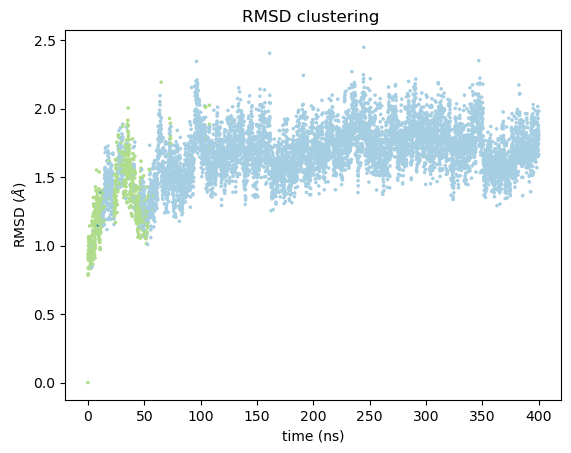

In [43]:
# ------- Chain2
classes_2 = np.unique(cl_labels_ch2)
count1_2 = (cl_labels_ch2 == 1).sum()
count2_2 = (cl_labels_ch2 == 2).sum()
count3_2 = (cl_labels_ch2 == 3).sum()

coll = [col[2], col[4], col[6]]
color = []
for ii in range(len(cl_labels_ch2)):
    if(cl_labels_ch2[ii] == 1):
        cc = col[0]
    elif (cl_labels_ch2[ii] == 2):
        cc = col[1]
    elif (cl_labels_ch2[ii] == 3):
        cc = col[2]
    color.append(cc)

time = rmsd_ca_3_eq[1]/1e3 # time in [ns]
time = time - time[0]
plt.scatter(time, rmsd_ch2_3_eq [2],  c = color, marker = '.', s = 10, label = 'chain 2')
plt.xlabel('time (ns)')
plt.ylabel('RMSD ($\AA$)')
plt.title('RMSD clustering ')

#plt.grid(color = '#DCDCDC', lw = 0.5)
#scatter = plt.scatter(time, rmsd_ca[2], c=cl_labels, marker = '.' )

plt.show()
    